# Machine Learning Term Paper

In [ ]:
#pip install kagglehub

In [ ]:
import kagglehub

# Download the latest version
path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

print("Path to dataset files:", path)

100%|██████████| 2.15M/2.15M [00:00<00:00, 27.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2


In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from scipy.stats import norm, randint

# List the files in the downloaded dataset folder
dataset_files = os.listdir(path)
print("Files in the dataset folder:", dataset_files)

Files in the dataset folder: ['Loan.csv', 'CSV Generation.py']


In [ ]:
# Assuming the dataset contains a CSV file
csv_file = [f for f in dataset_files if f.endswith(".csv")][0]  # Get the first CSV file
dataset_path = os.path.join(path, csv_file)

# Load the CSV file
data = pd.read_csv(dataset_path)
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000   

In [ ]:
data.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [ ]:
data.shape

(20000, 36)

In [ ]:
print(data['ApplicationDate'].dtype)

object


In [ ]:
# Replace 'your_date_column' with the name of the column you want to convert
data['Application_date'] = pd.to_datetime(data['ApplicationDate'], errors='coerce')

# Verify conversion
print(data['Application_date'].head())


0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: Application_date, dtype: datetime64[ns]


In [ ]:
print(data['Application_date'].min())
print(data['Application_date'].max())

2018-01-01 00:00:00
2072-10-03 00:00:00


Application Dates range from 2018 to 2072.

# Train, Validation, and Test Split

In [ ]:
df = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']                # Target variable

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=df['EducationLevel'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.15/0.85, random_state=42)

In [ ]:
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("test set:", X_test.shape)

Train set: (14000, 36)
Validation set: (3000, 36)
test set: (3000, 36)


In [ ]:
X_train.dtypes

ApplicationDate                       object
Age                                    int64
AnnualIncome                           int64
CreditScore                            int64
EmploymentStatus                      object
EducationLevel                        object
Experience                             int64
LoanAmount                             int64
LoanDuration                           int64
MaritalStatus                         object
NumberOfDependents                     int64
HomeOwnershipStatus                   object
MonthlyDebtPayments                    int64
CreditCardUtilizationRate            float64
NumberOfOpenCreditLines                int64
NumberOfCreditInquiries                int64
DebtToIncomeRatio                    float64
BankruptcyHistory                      int64
LoanPurpose                           object
PreviousLoanDefaults                   int64
PaymentHistory                         int64
LengthOfCreditHistory                  int64
SavingsAccountBalance                  int64
CheckingAccountBalance                 int64
TotalAssets                            int64
TotalLiabilities                       int64
MonthlyIncome                        float64
UtilityBillsPaymentHistory           float64
JobTenure                              int64
NetWorth                               int64
BaseInterestRate                     float64
InterestRate                         float64
MonthlyLoanPayment                   float64
TotalDebtToIncomeRatio               float64
RiskScore                            float64
Application_date              datetime64[ns]
dtype: object

## Dealing with Missing Values

In [ ]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
Application_date              0
dtype: int64

No missing Values!

# Building Pipeline

In [ ]:
X.dtypes

ApplicationDate                       object
Age                                    int64
AnnualIncome                           int64
CreditScore                            int64
EmploymentStatus                      object
EducationLevel                        object
Experience                             int64
LoanAmount                             int64
LoanDuration                           int64
MaritalStatus                         object
NumberOfDependents                     int64
HomeOwnershipStatus                   object
MonthlyDebtPayments                    int64
CreditCardUtilizationRate            float64
NumberOfOpenCreditLines                int64
NumberOfCreditInquiries                int64
DebtToIncomeRatio                    float64
BankruptcyHistory                      int64
LoanPurpose                           object
PreviousLoanDefaults                   int64
PaymentHistory                         int64
LengthOfCreditHistory                  int64
SavingsAccountBalance                  int64
CheckingAccountBalance                 int64
TotalAssets                            int64
TotalLiabilities                       int64
MonthlyIncome                        float64
UtilityBillsPaymentHistory           float64
JobTenure                              int64
NetWorth                               int64
BaseInterestRate                     float64
InterestRate                         float64
MonthlyLoanPayment                   float64
TotalDebtToIncomeRatio               float64
RiskScore                            float64
Application_date              datetime64[ns]
dtype: object

In [ ]:
# Drop the date columns and Risk score
X = X.iloc[:, 1:-2]

In [ ]:
X.dtypes

Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBillsPaymentHistory    float64
JobTenure                       int64
NetWorth                        int64
BaseInterestRate              float64
InterestRate                  float64
MonthlyLoanPayment            float64
TotalDebtToIncomeRatio        float64
dtype: object

In [ ]:
# seperating categorical and numerical features
cat_df = X.select_dtypes(include='object')
num_df = X.select_dtypes(exclude='object')

# Verify the results
print("Categorical Features:")
print(cat_df.dtypes)

print("Numerical Features:")
print(num_df.dtypes)


Categorical Features:
EmploymentStatus       object
EducationLevel         object
MaritalStatus          object
HomeOwnershipStatus    object
LoanPurpose            object
dtype: object
Numerical Features:
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
NumberOfDependents              int64
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 floa

In [ ]:
# importing Libraries
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
cat_features = list(cat_df)
num_features = list(num_df)


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('encode', OneHotEncoder(handle_unknown='ignore',sparse_output=False), cat_features)
    ])

prepared_data = preprocessor.fit_transform(X_train)

In [ ]:
# Combine preprocessor with classifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:
prepared_data

array([[ 0.8770831 ,  0.05180372,  0.28817949, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10034865, -0.51939241,  0.01560621, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01733016, -1.01821969, -0.82158314, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96305839,  0.79560444,  1.02802124, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10330546, -0.59701445, -0.51007082, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18632395,  1.6080968 ,  0.01560621, ...,  0.        ,
         0.        ,  0.        ]])

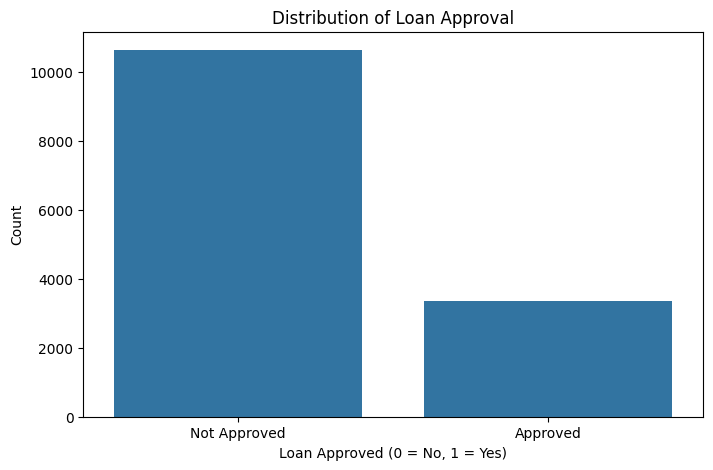

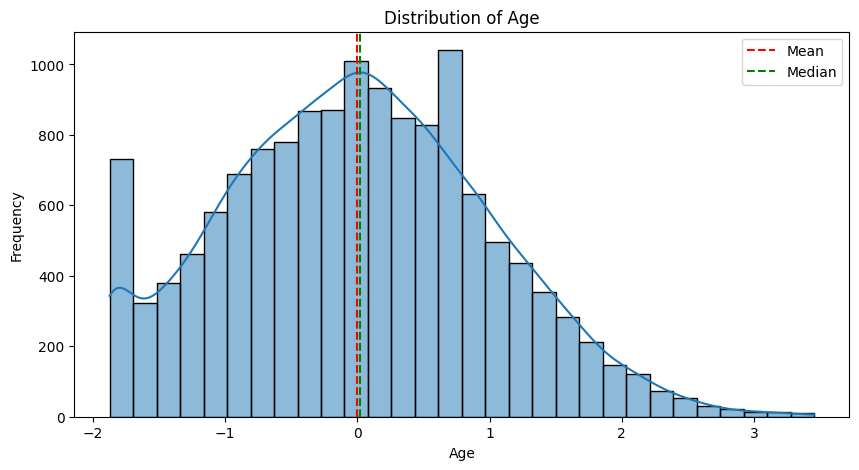

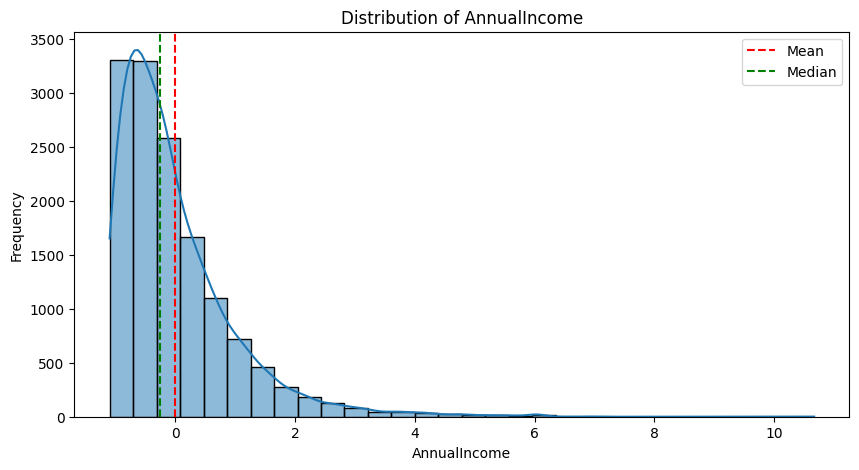

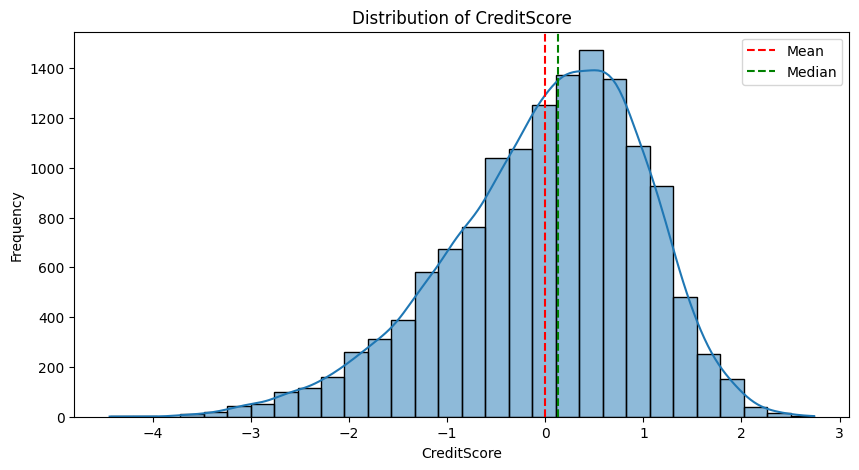

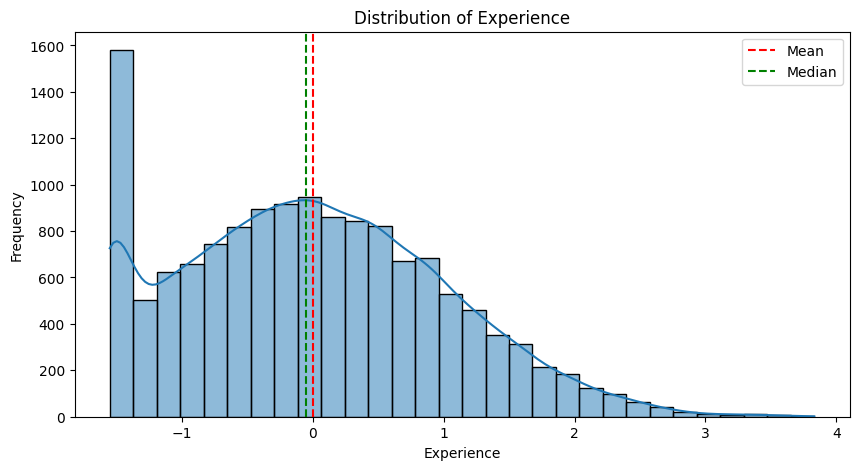

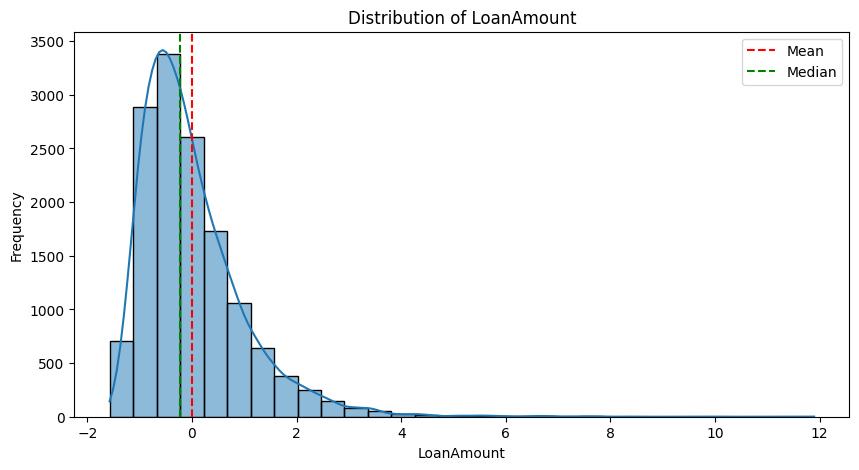

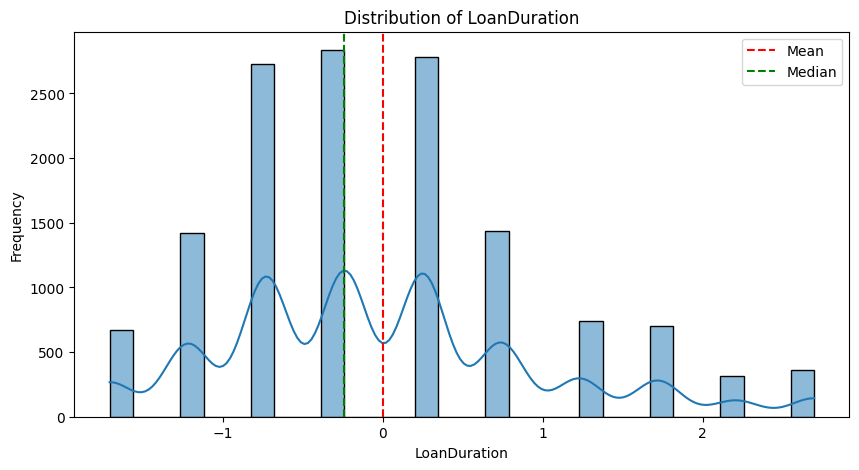

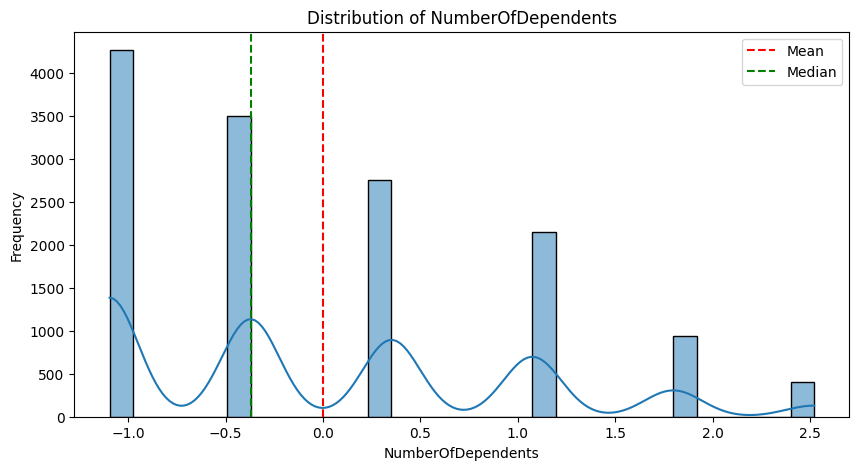

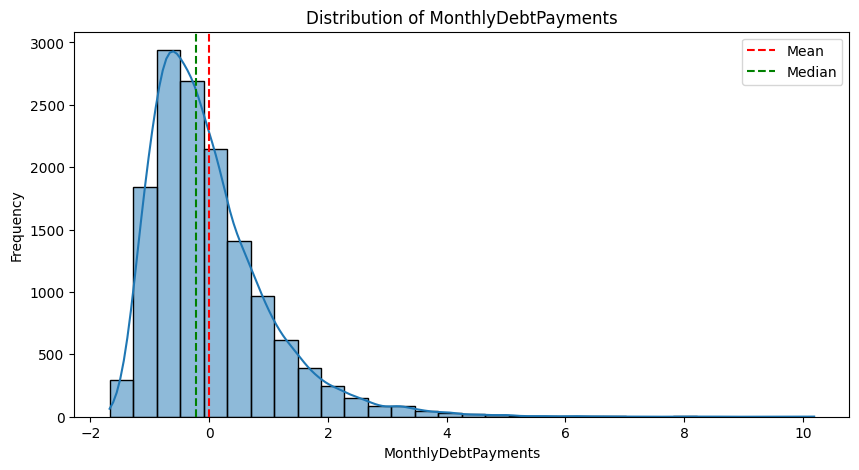

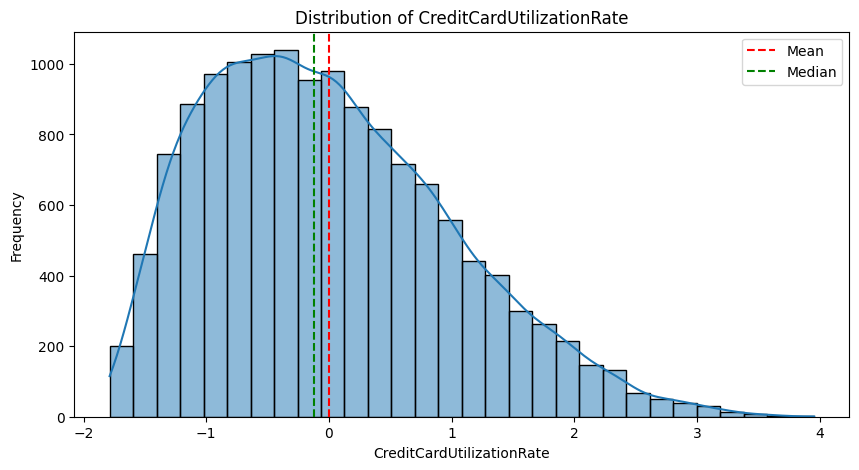

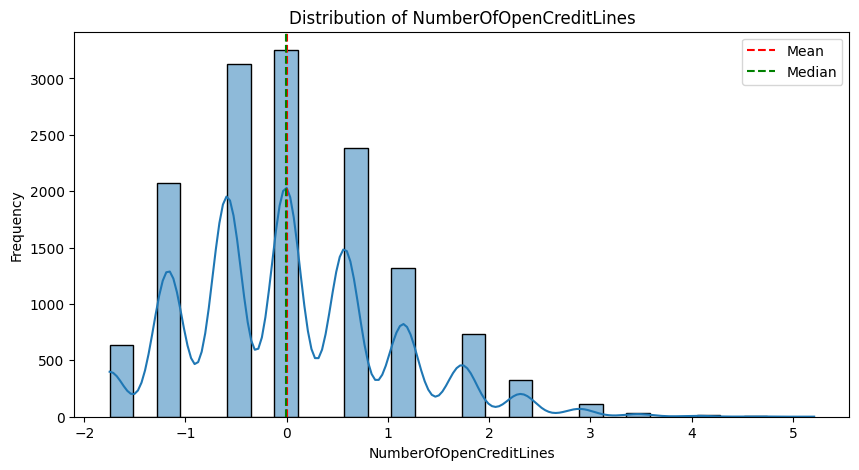

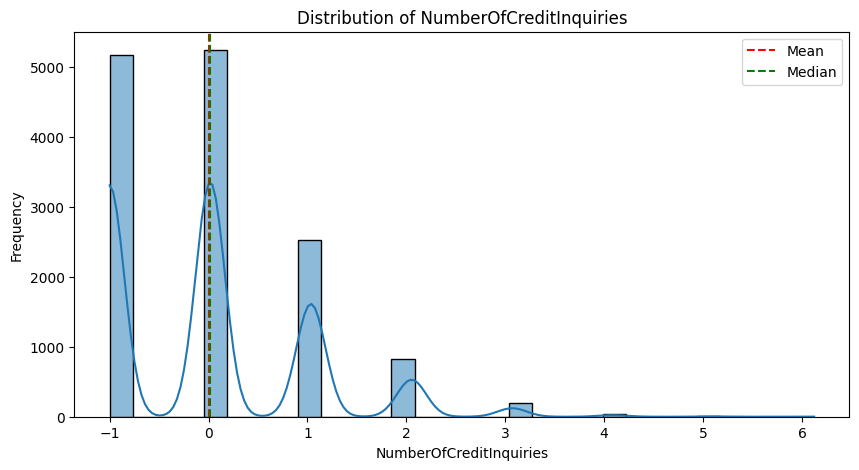

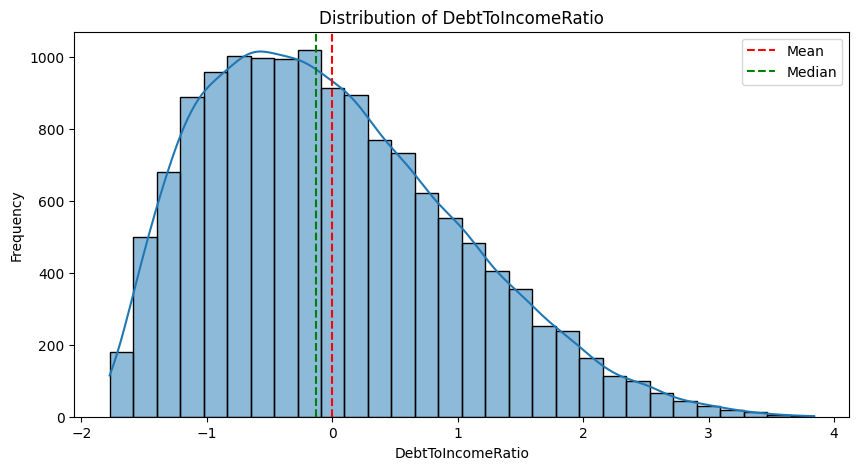

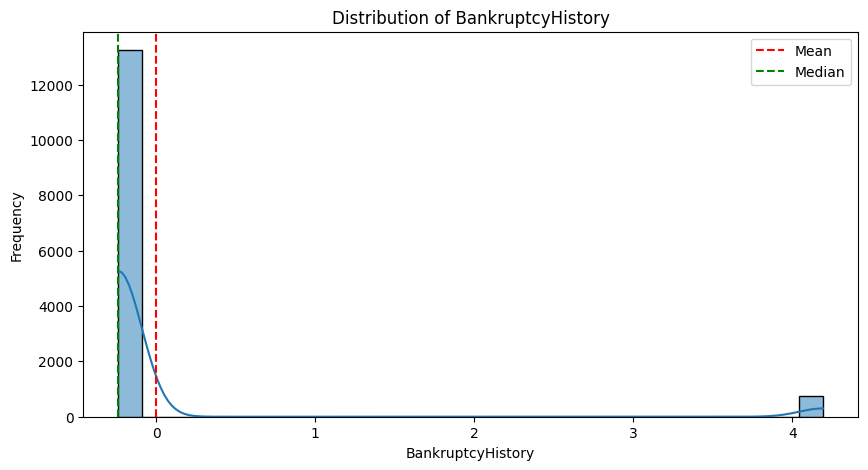

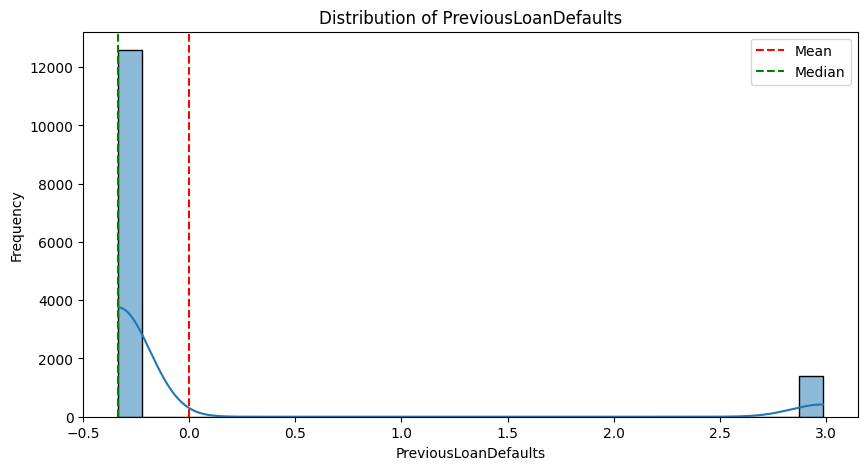

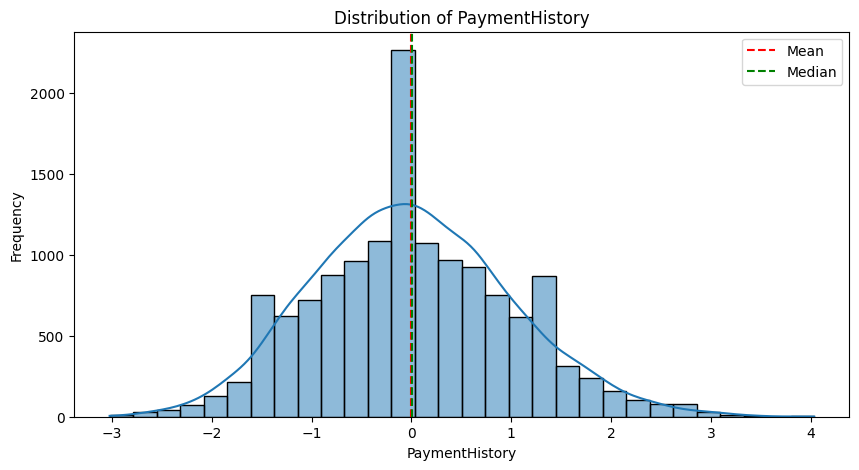

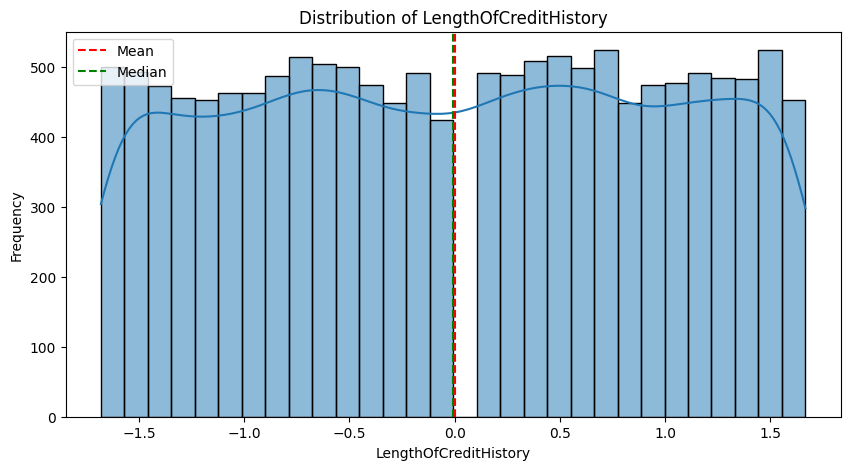

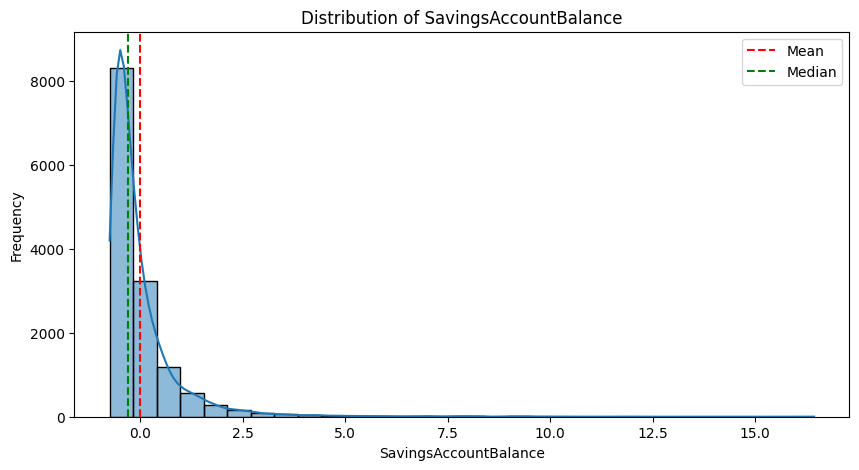

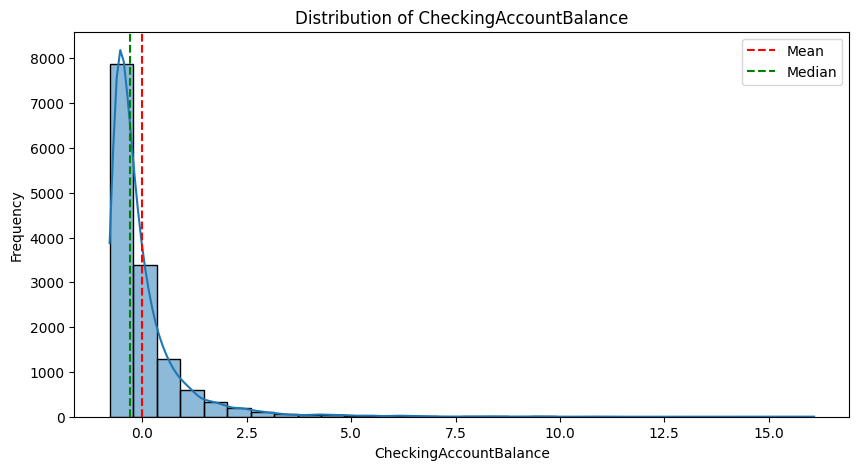

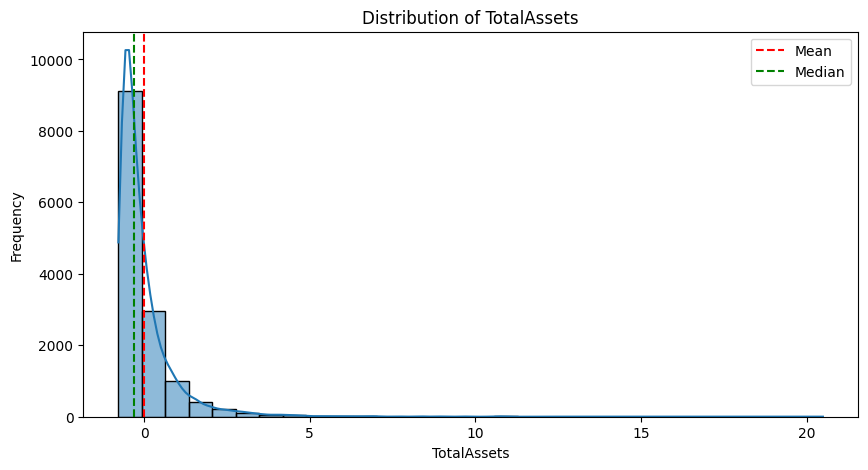

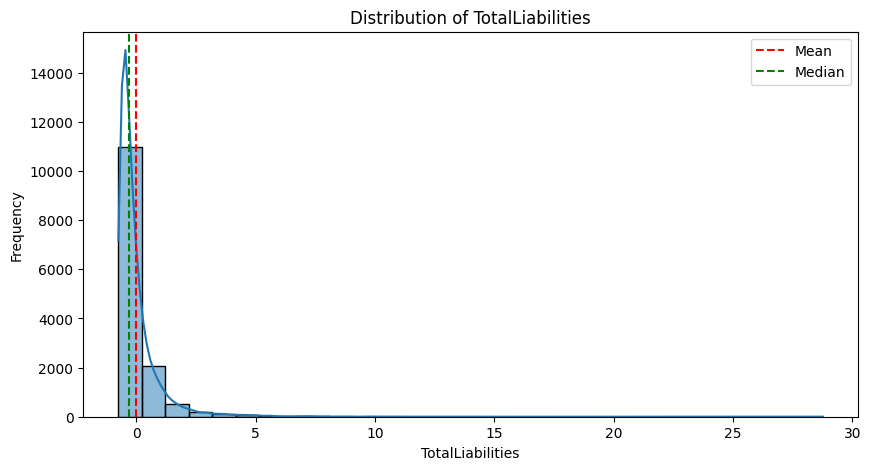

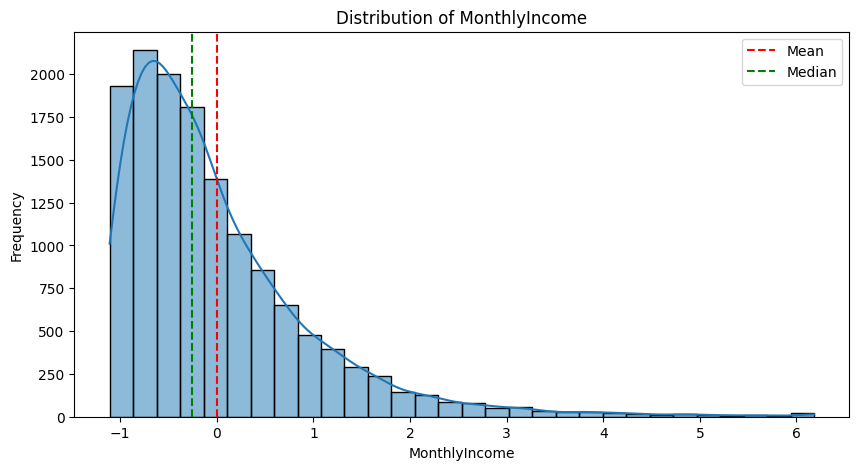

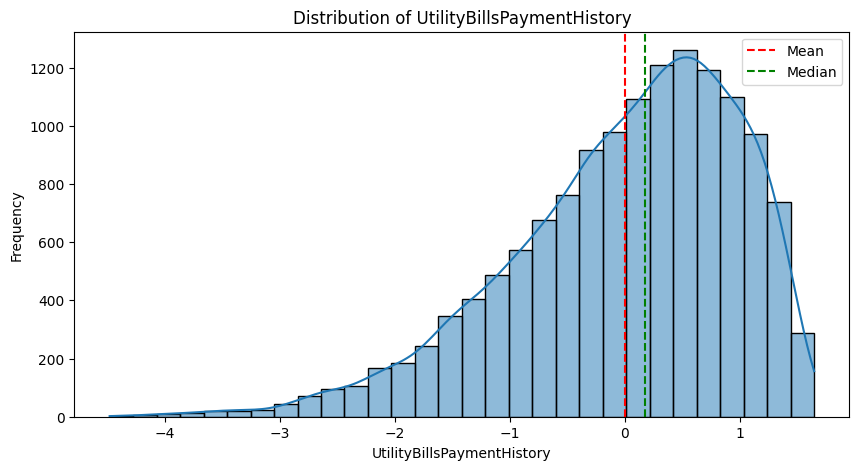

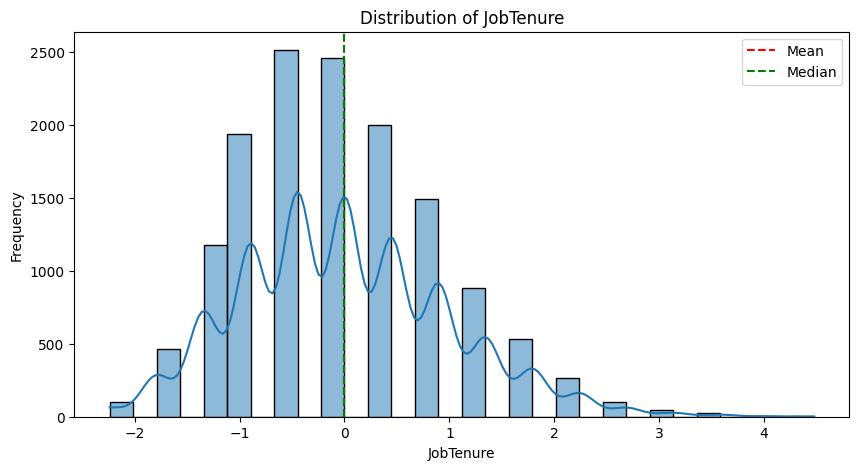

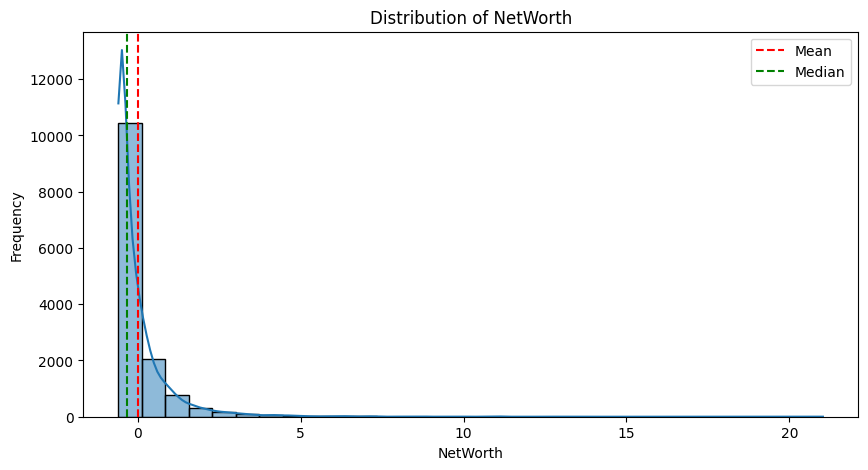

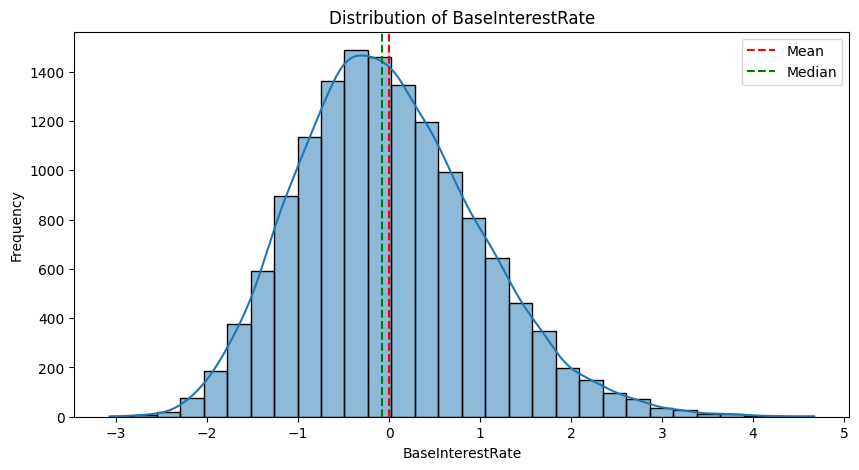

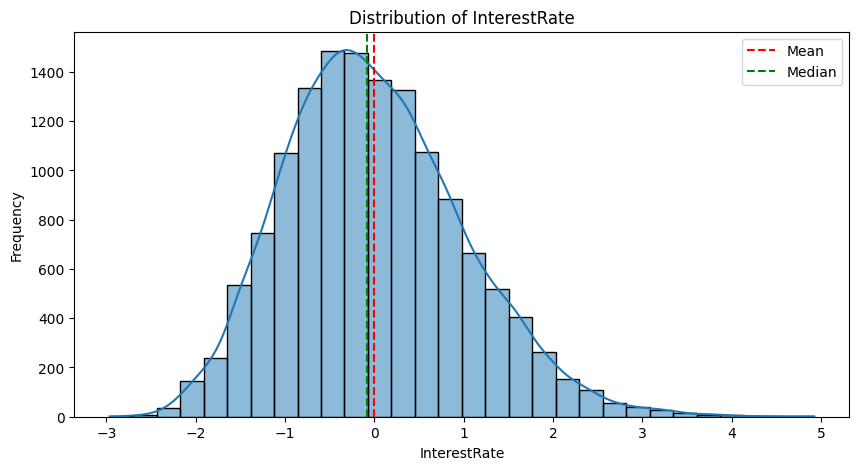

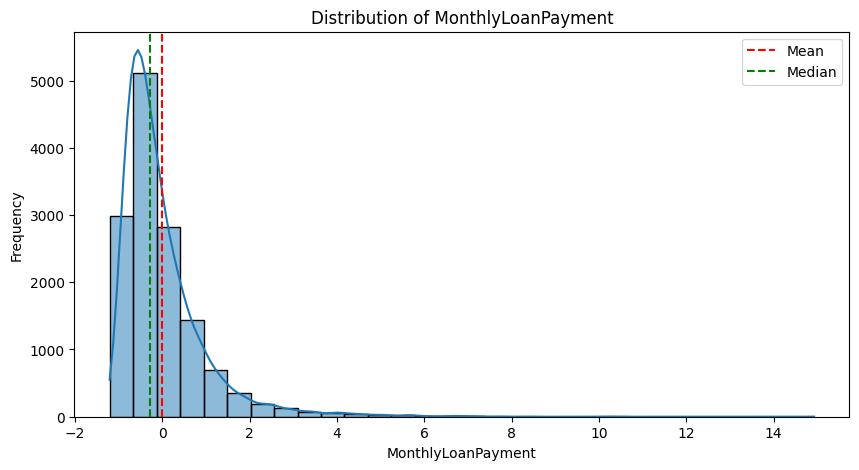

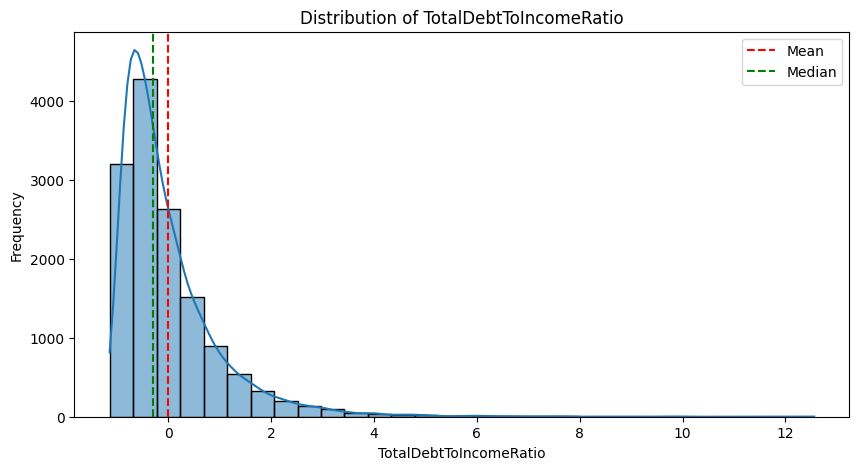

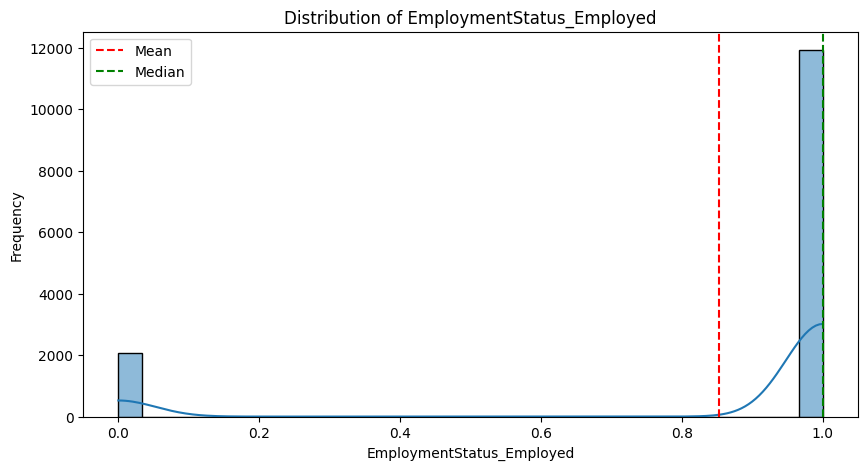

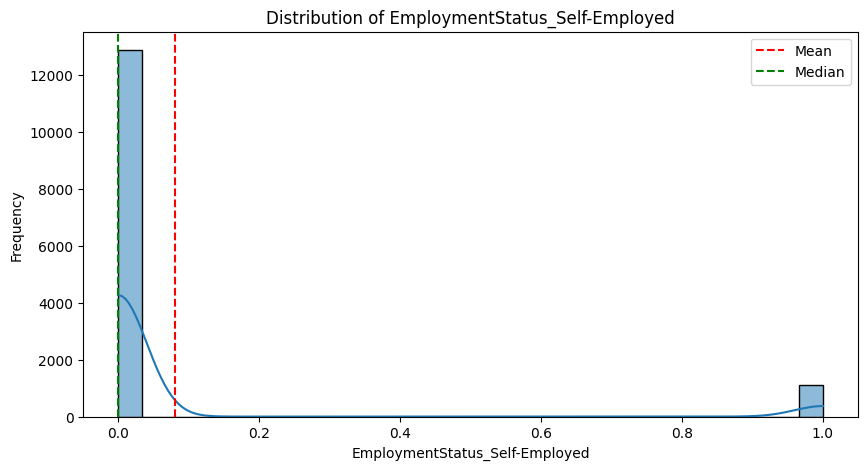

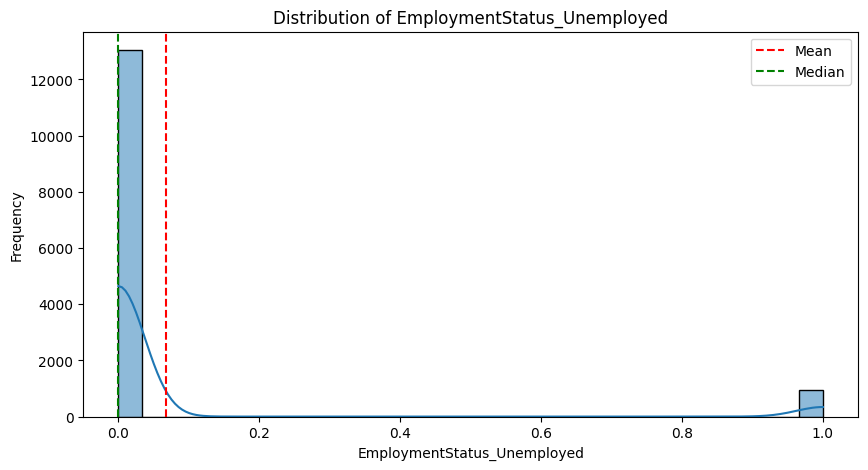

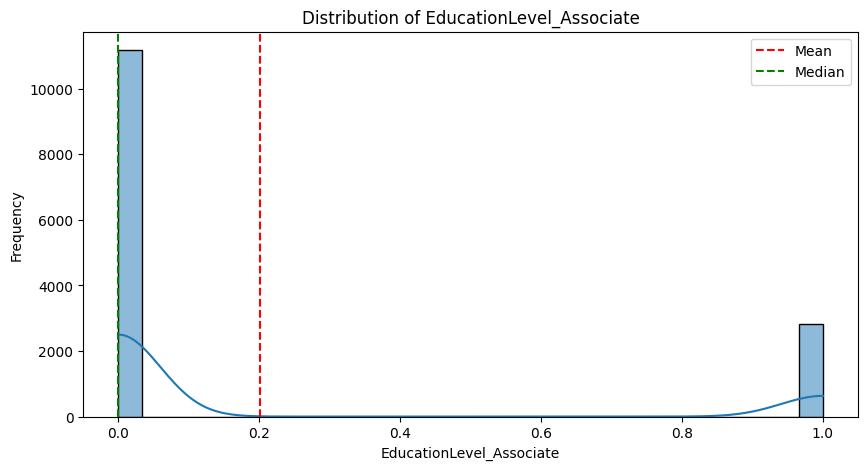

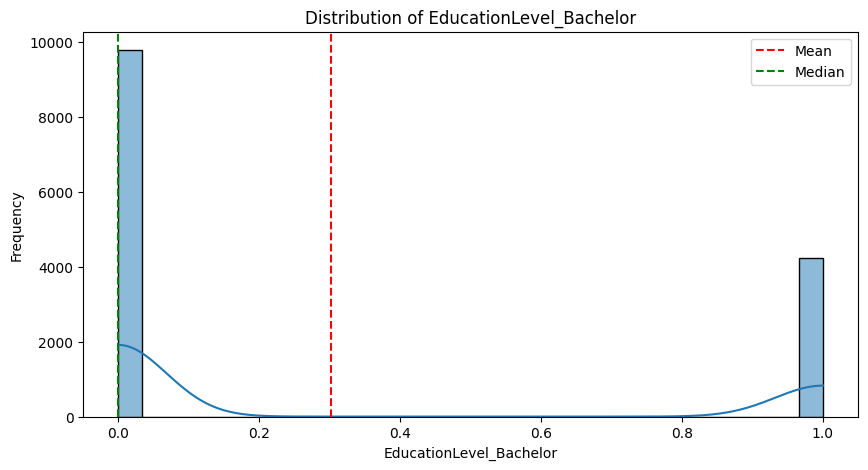

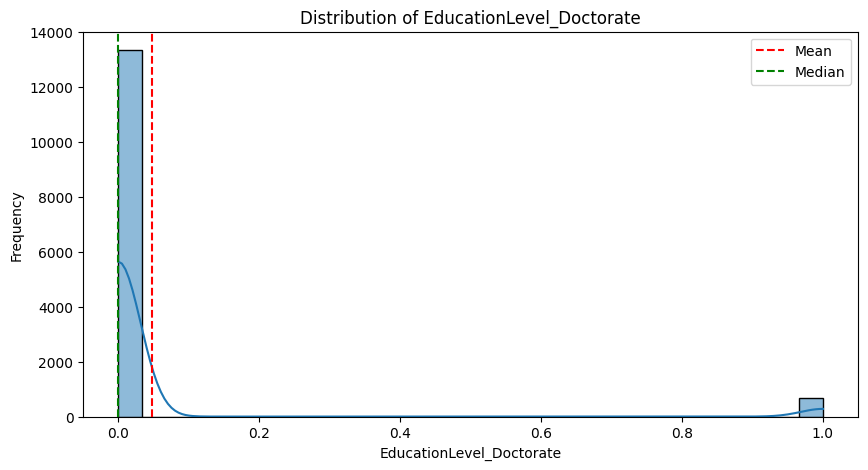

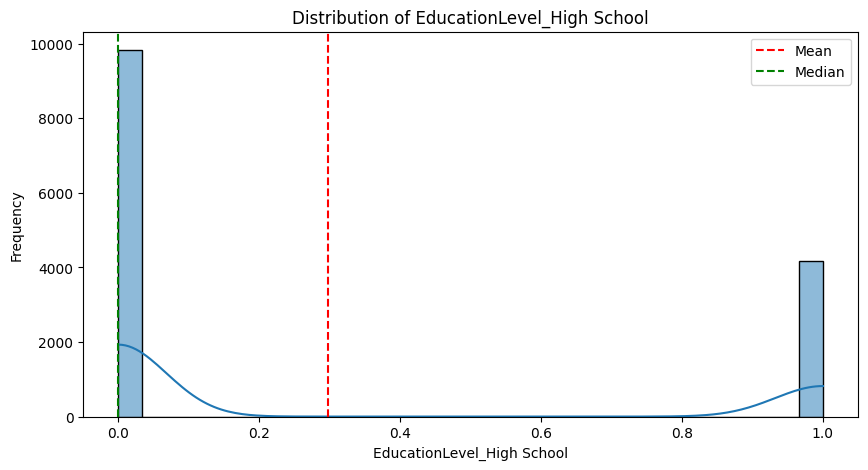

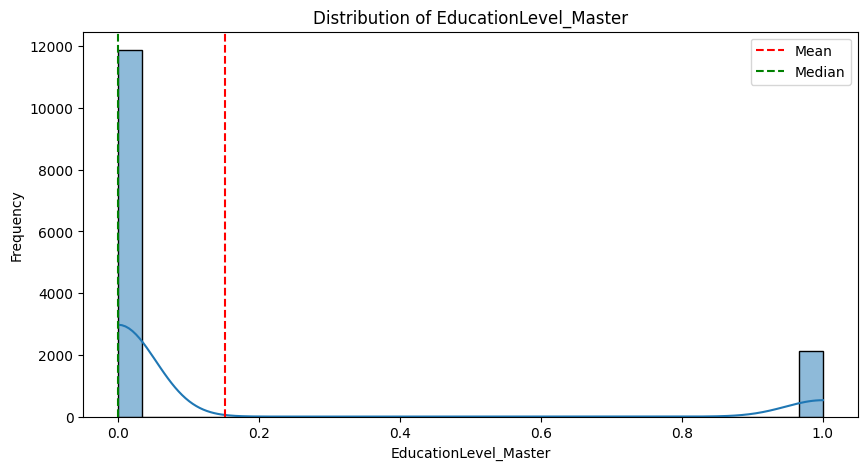

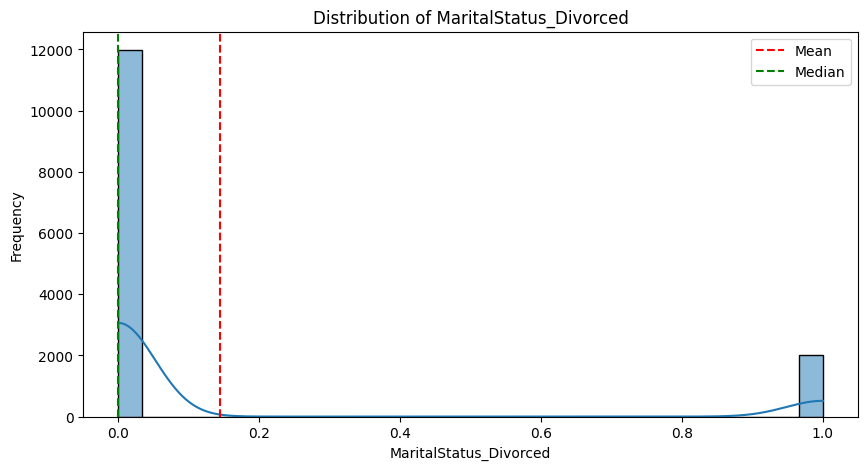

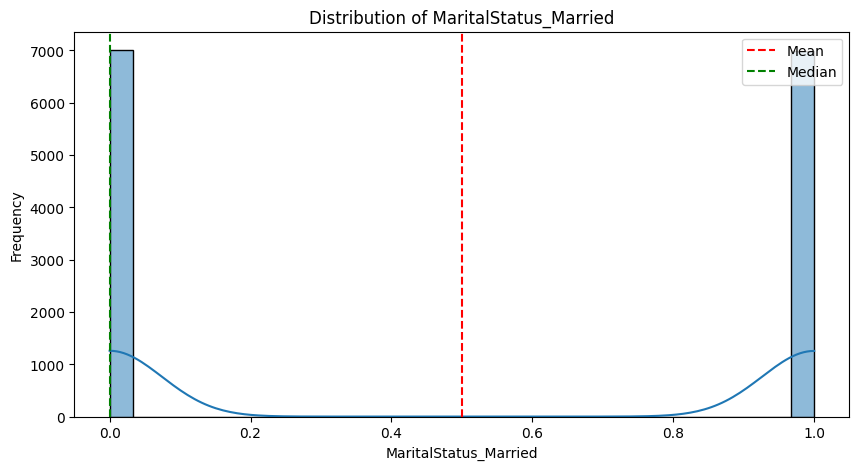

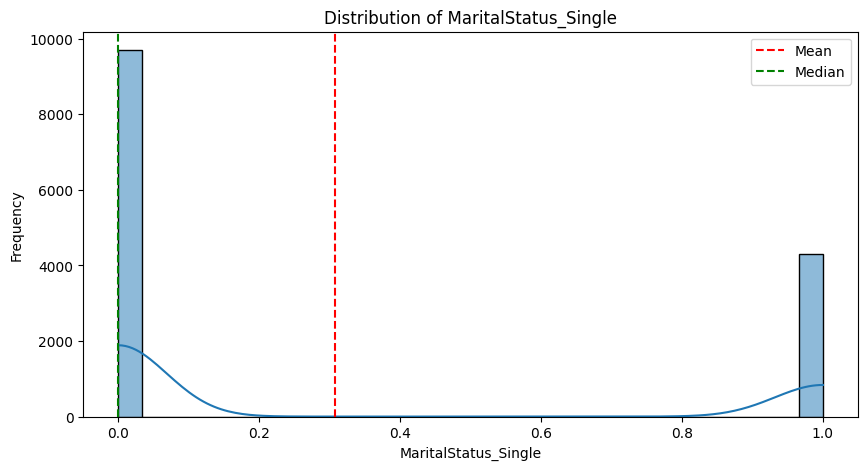

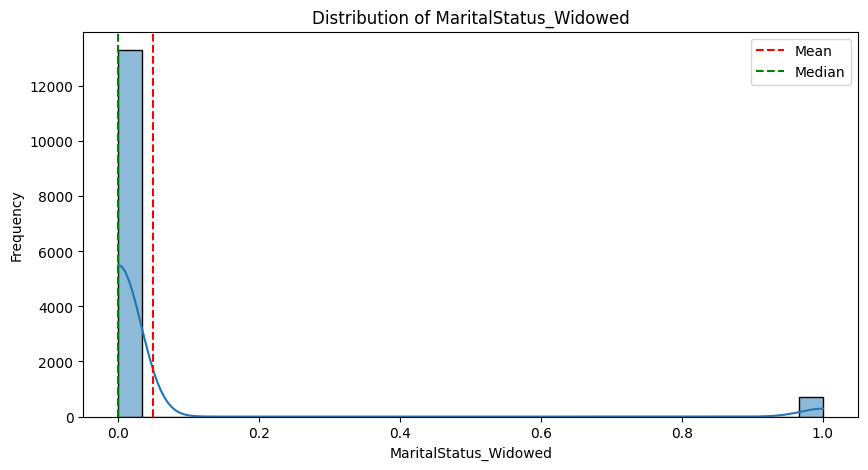

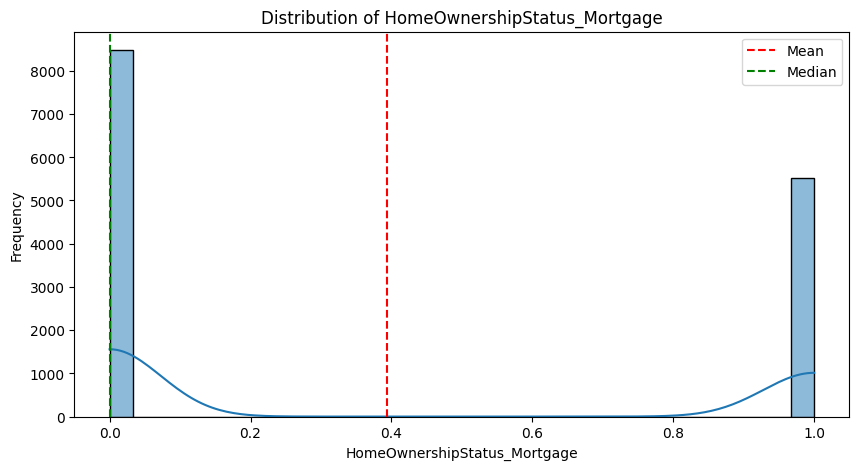

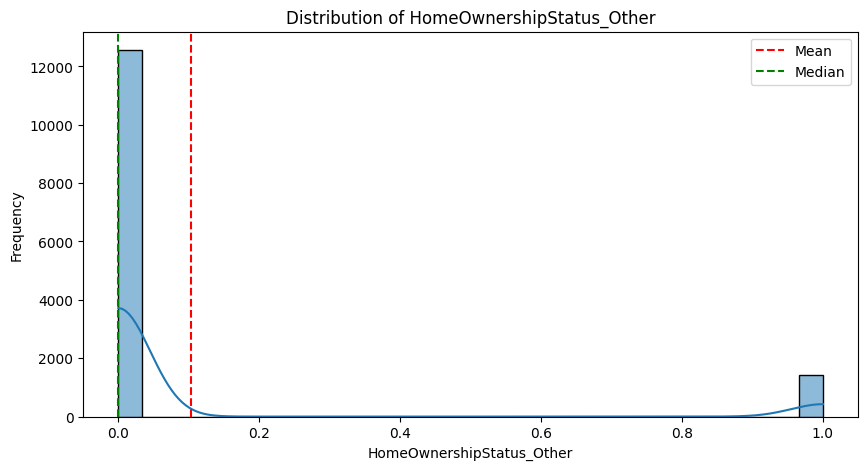

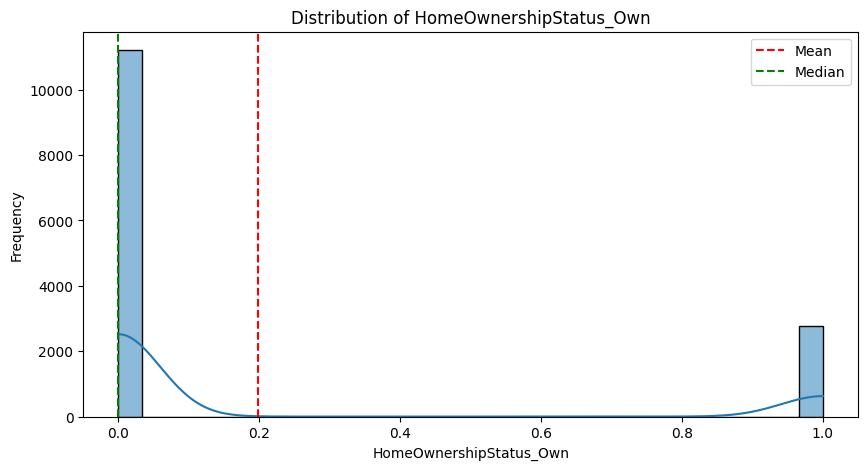

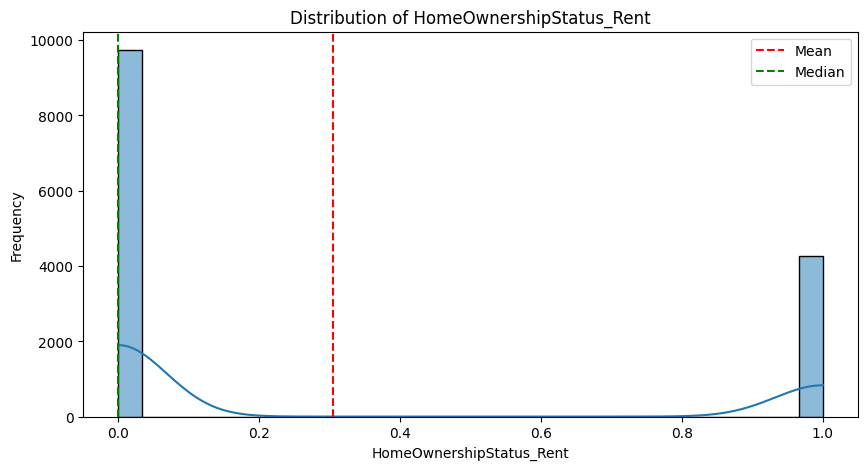

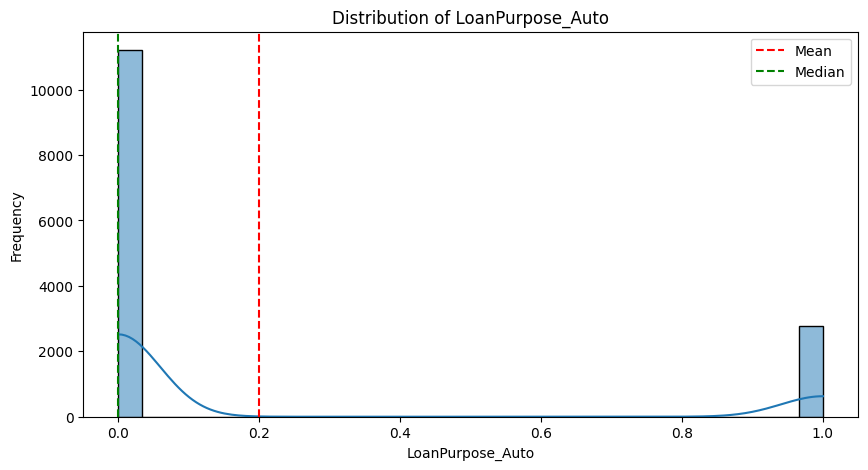

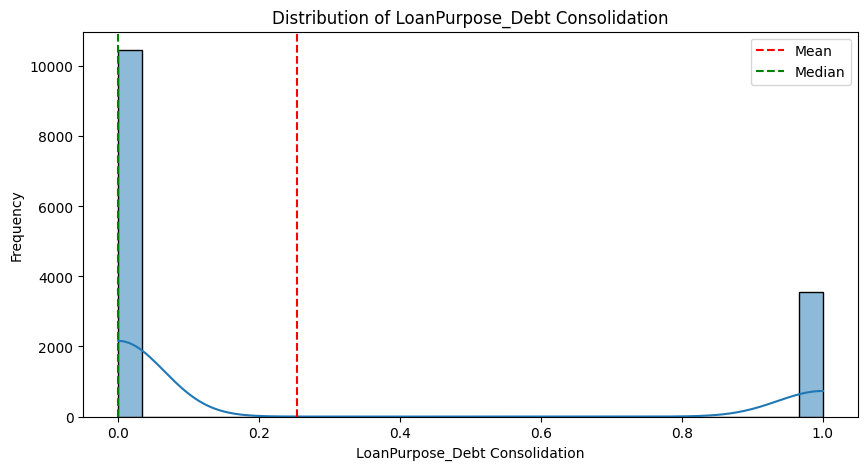

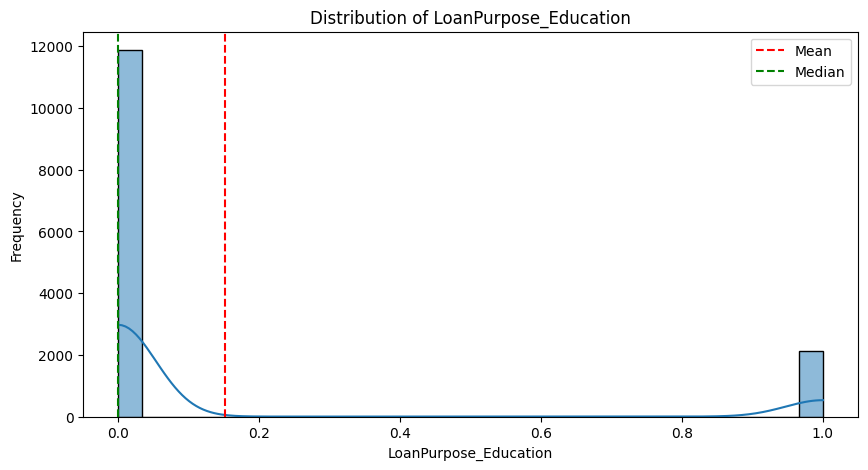

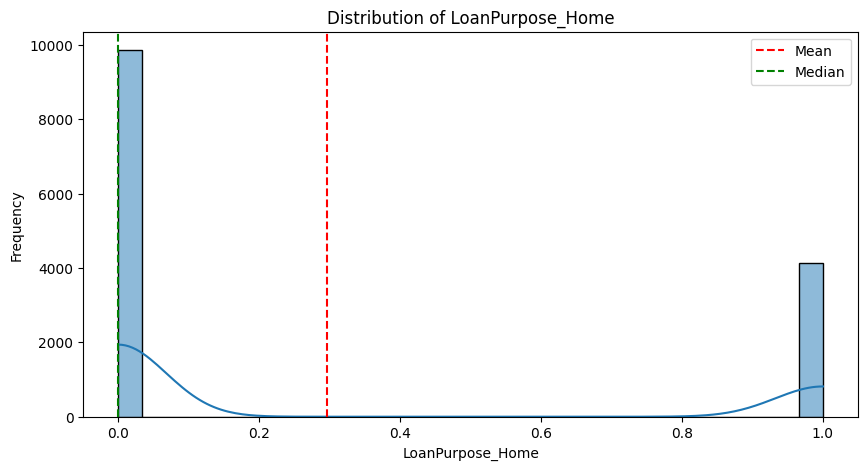

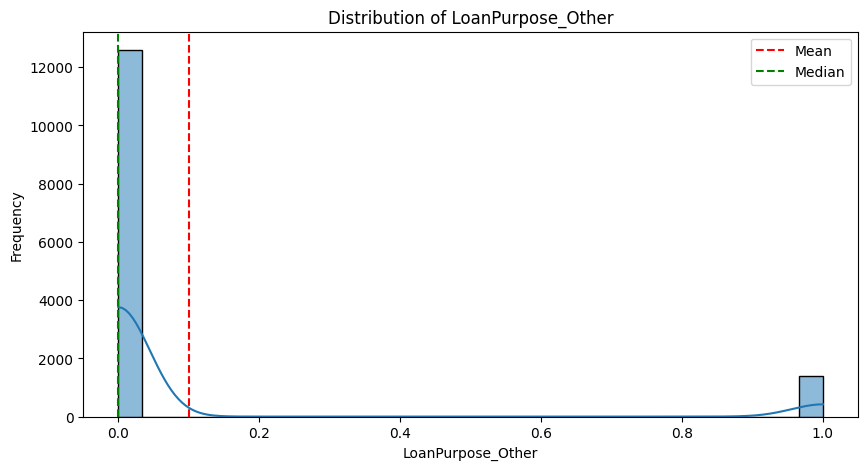

In [ ]:
# Plotting the distribution of LoanApproved

cat_features = list(cat_df)
num_features = list(num_df)

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ])

prepared_data_array = preprocessor.fit_transform(X_train)

# Get feature names after transformation
feature_names = num_features + preprocessor.named_transformers_['encode'].get_feature_names_out(cat_features).tolist()

# Convert the NumPy array to a pandas DataFrame with column names
prepared_data = pd.DataFrame(prepared_data_array, columns=feature_names)

prepared_data['LoanApproved'] = y_train.values

# Plotting the distribution of LoanApproved
plt.figure(figsize=(8, 5))
sns.countplot(x='LoanApproved', data=prepared_data)
plt.title('Distribution of Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

independent_vars = prepared_data.drop(columns=['LoanApproved'])

# Plotting distributions for each independent variable
for column in independent_vars.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(independent_vars[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.axvline(independent_vars[column].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(independent_vars[column].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

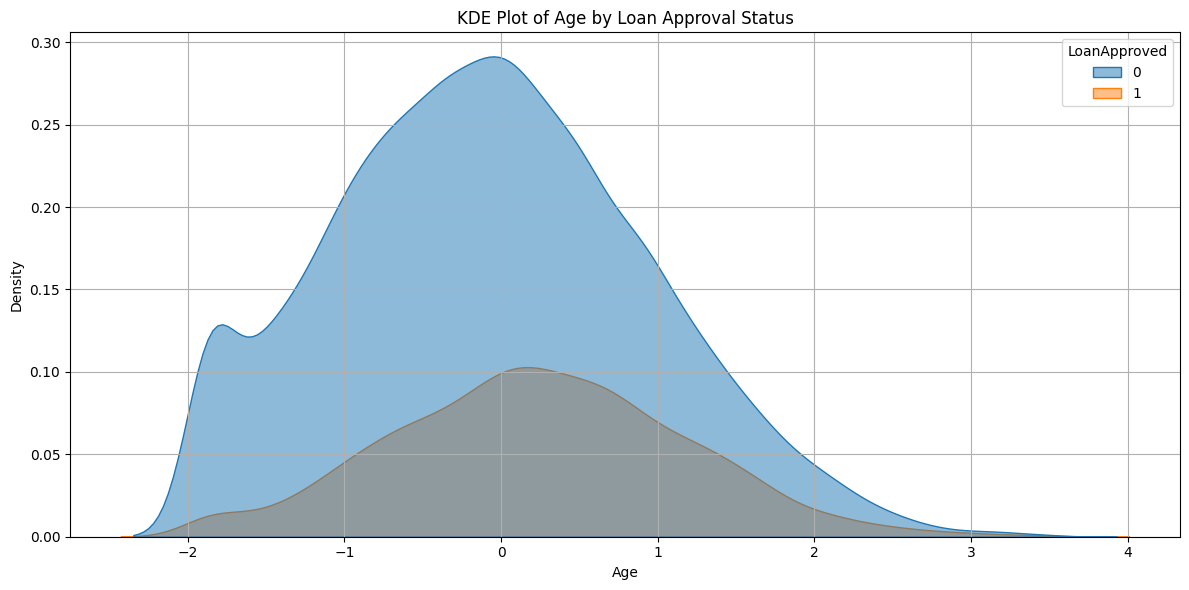

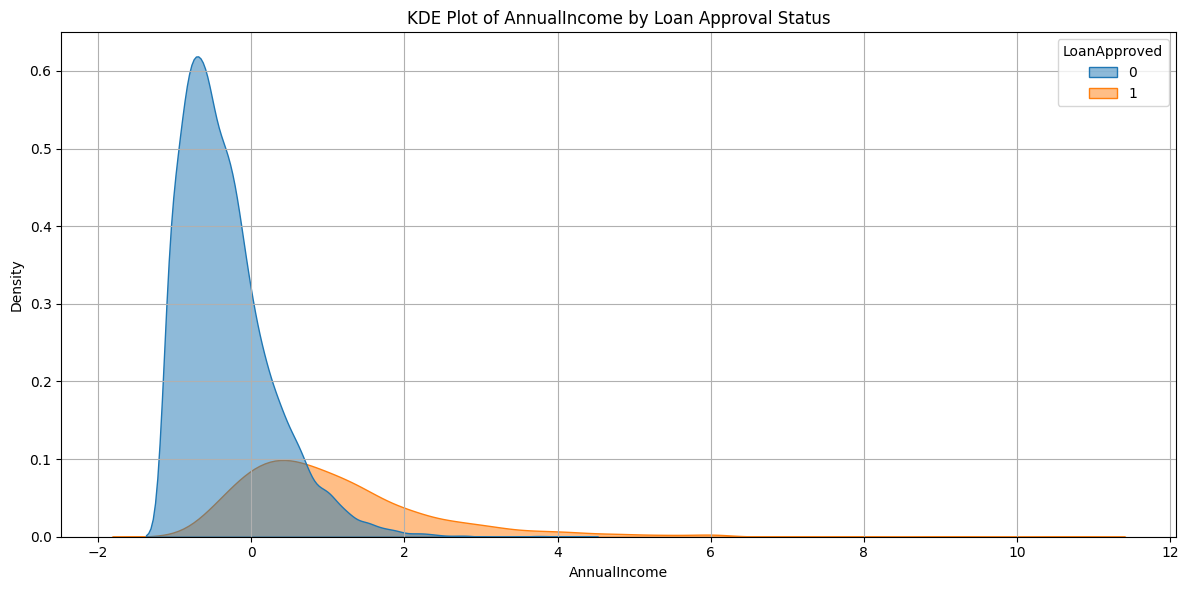

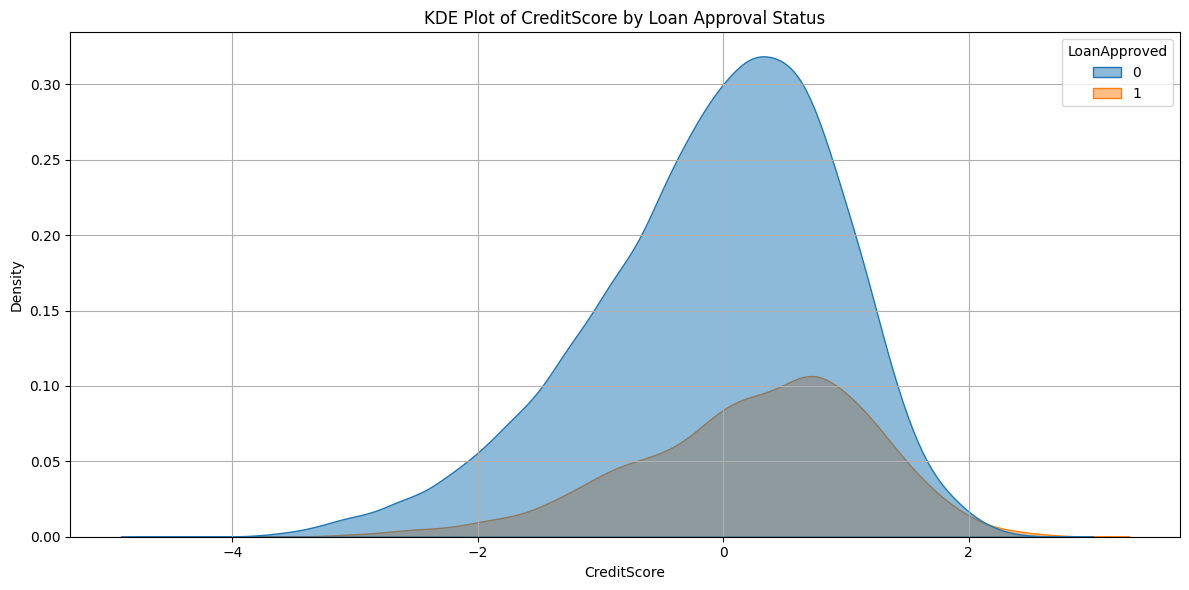

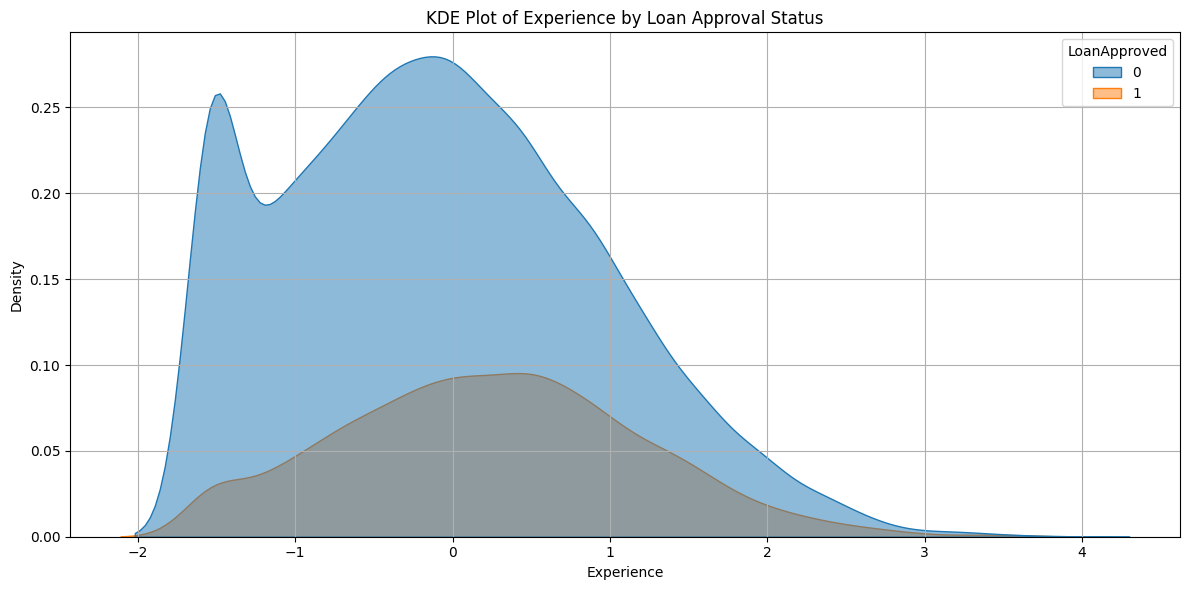

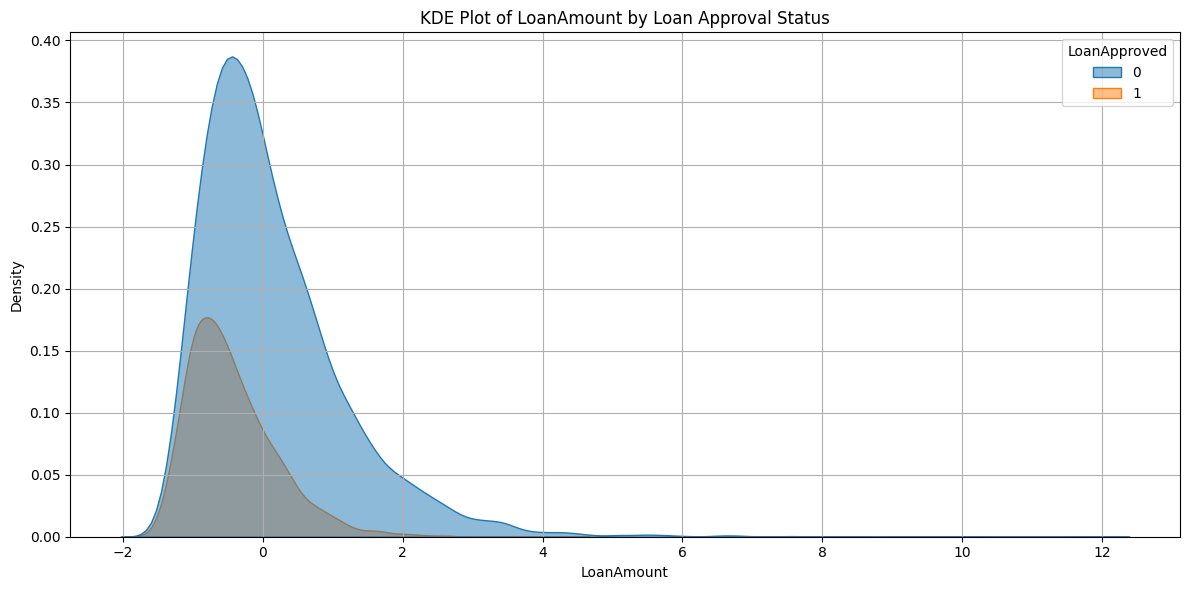

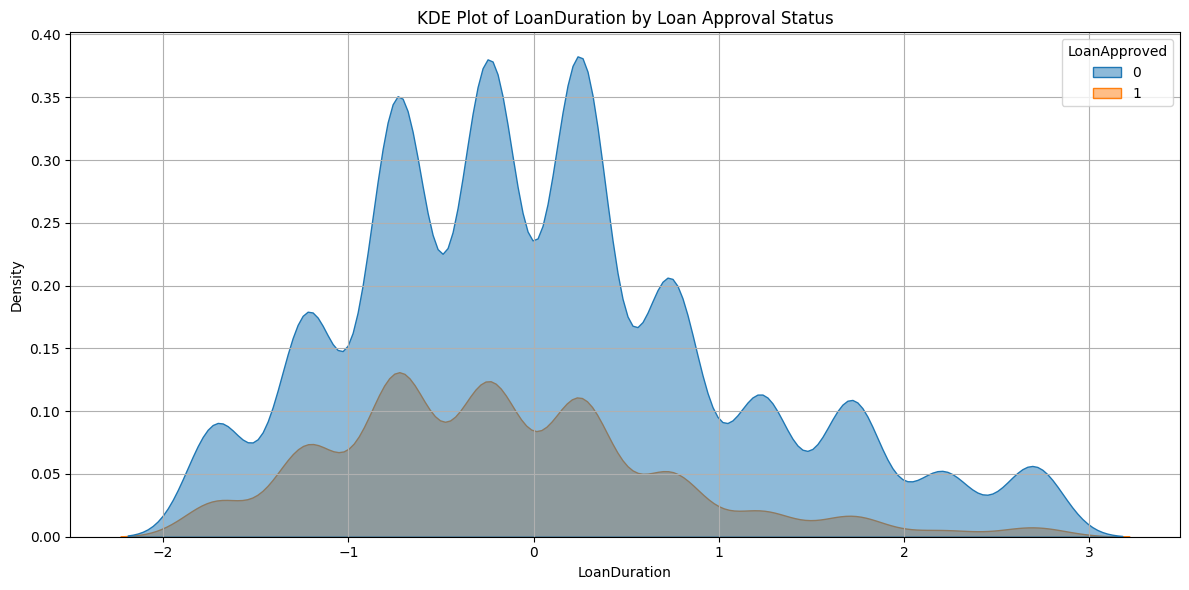

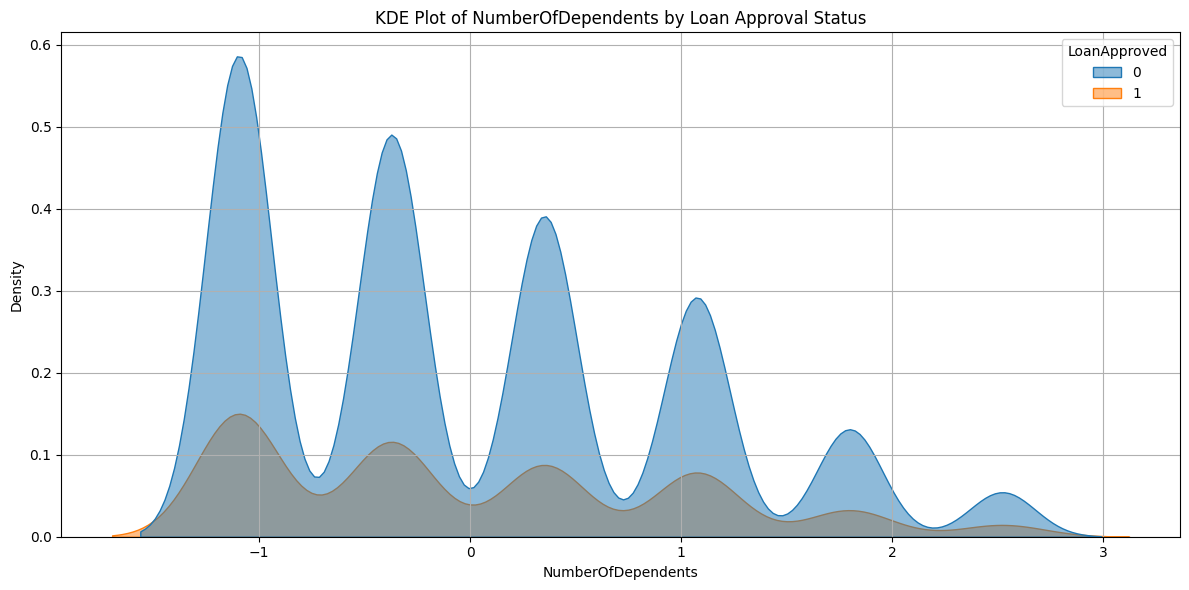

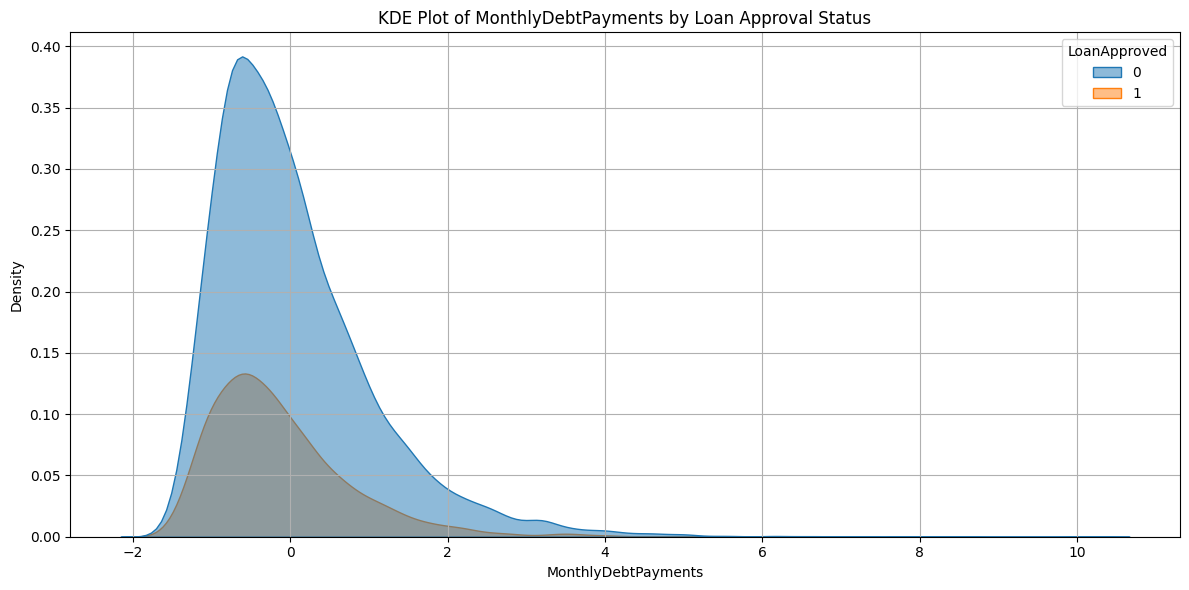

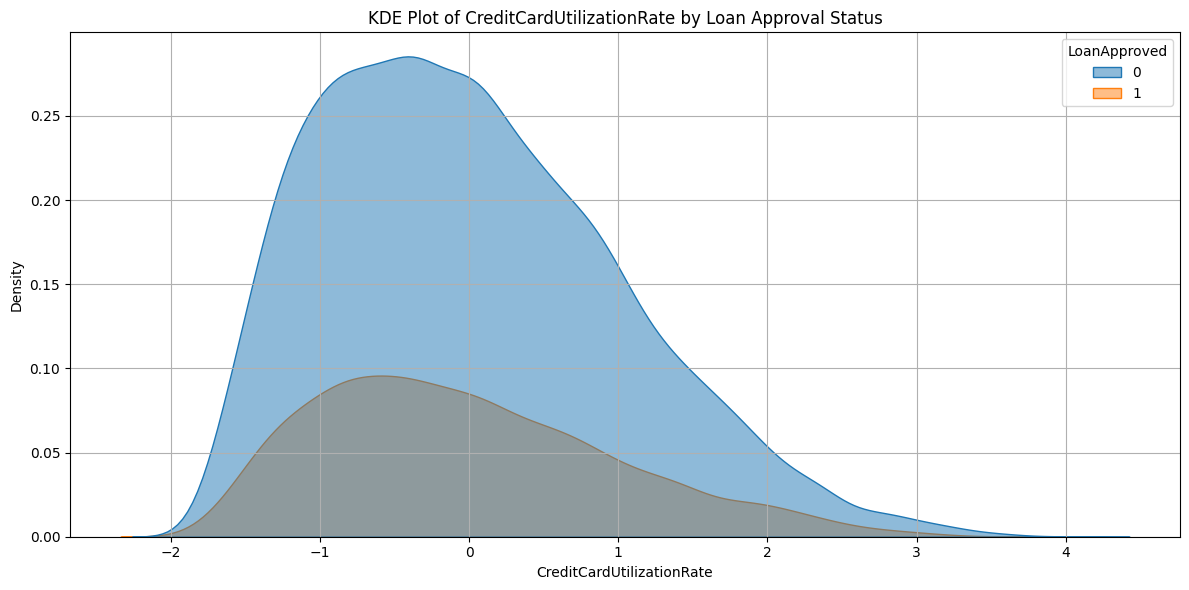

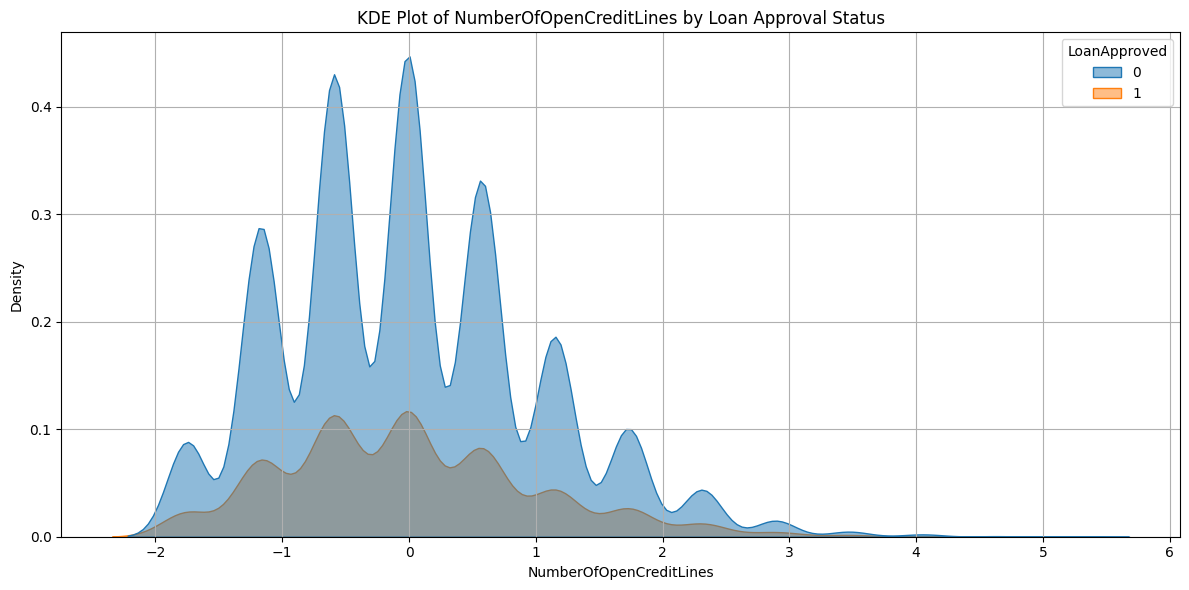

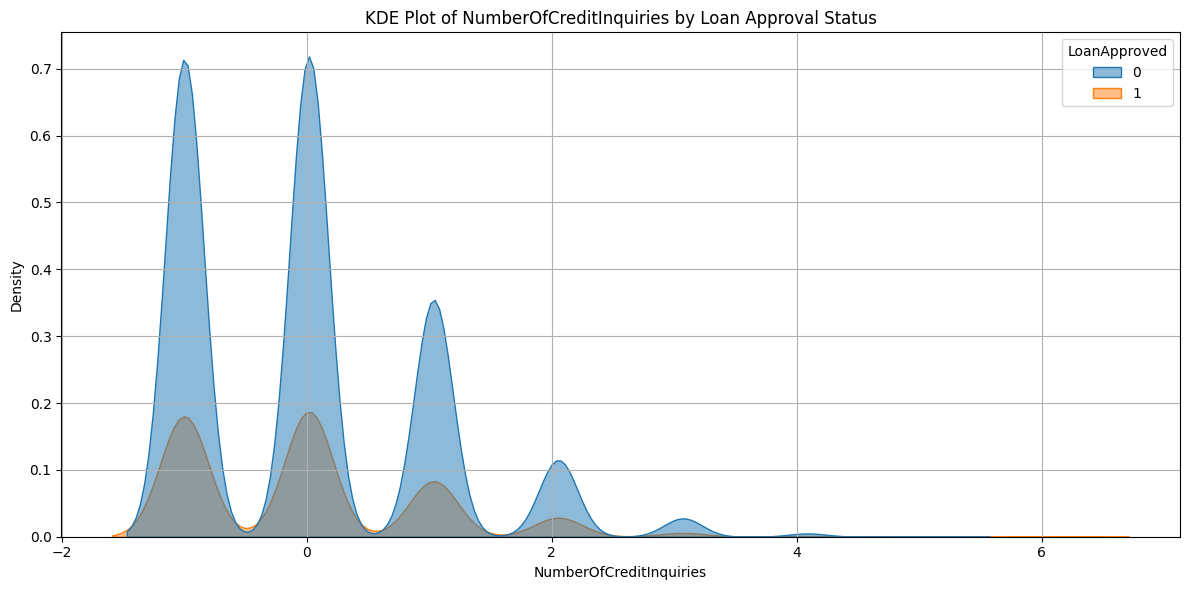

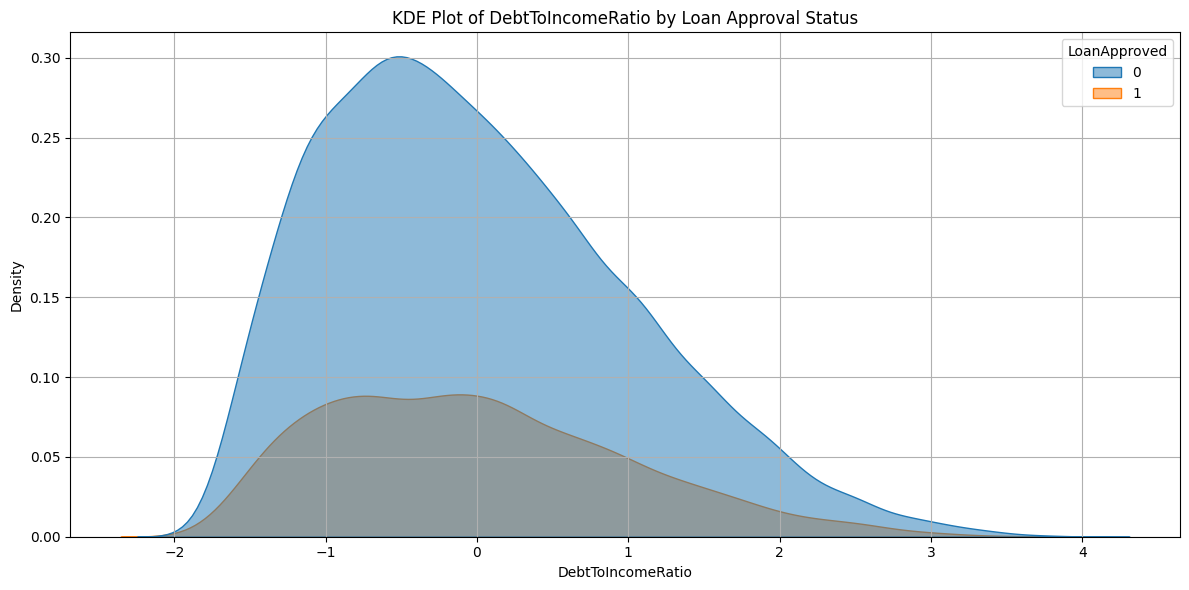

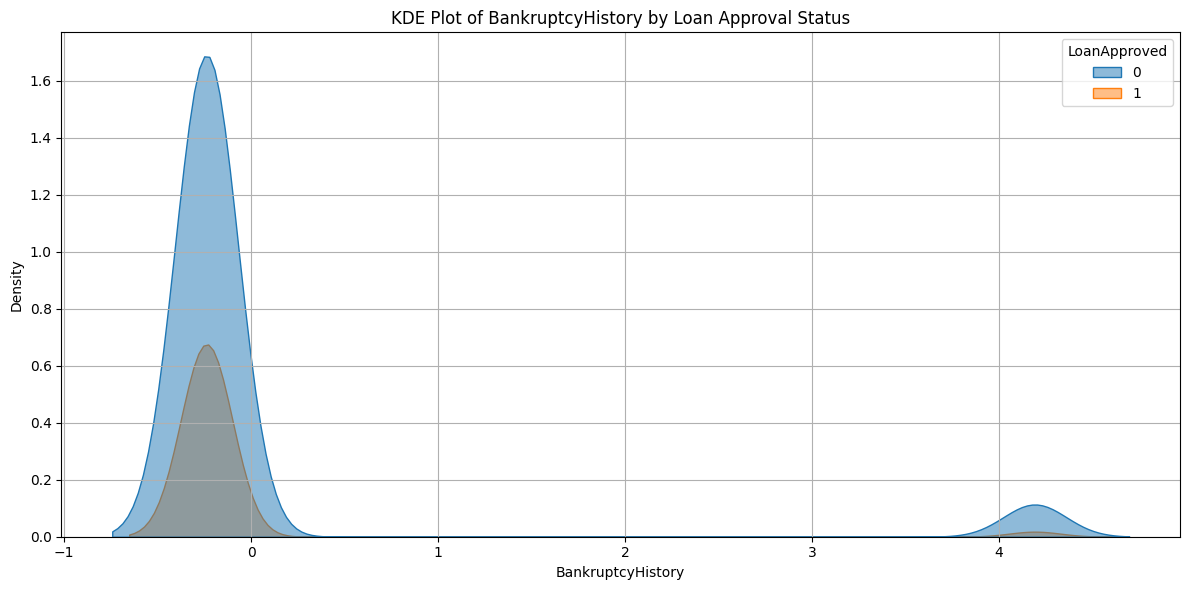

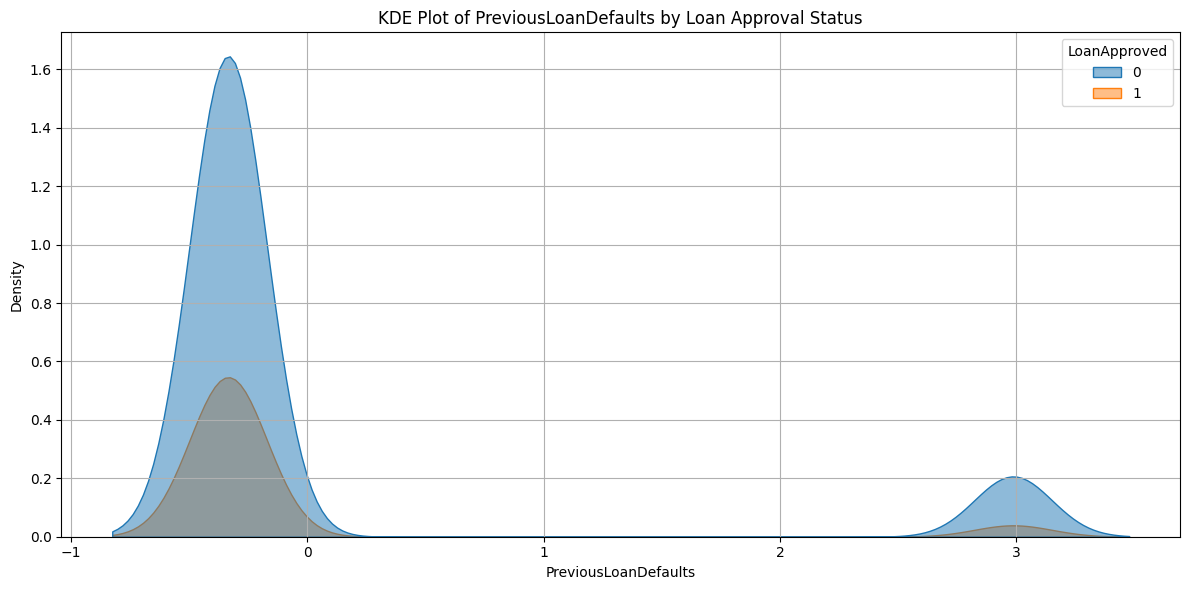

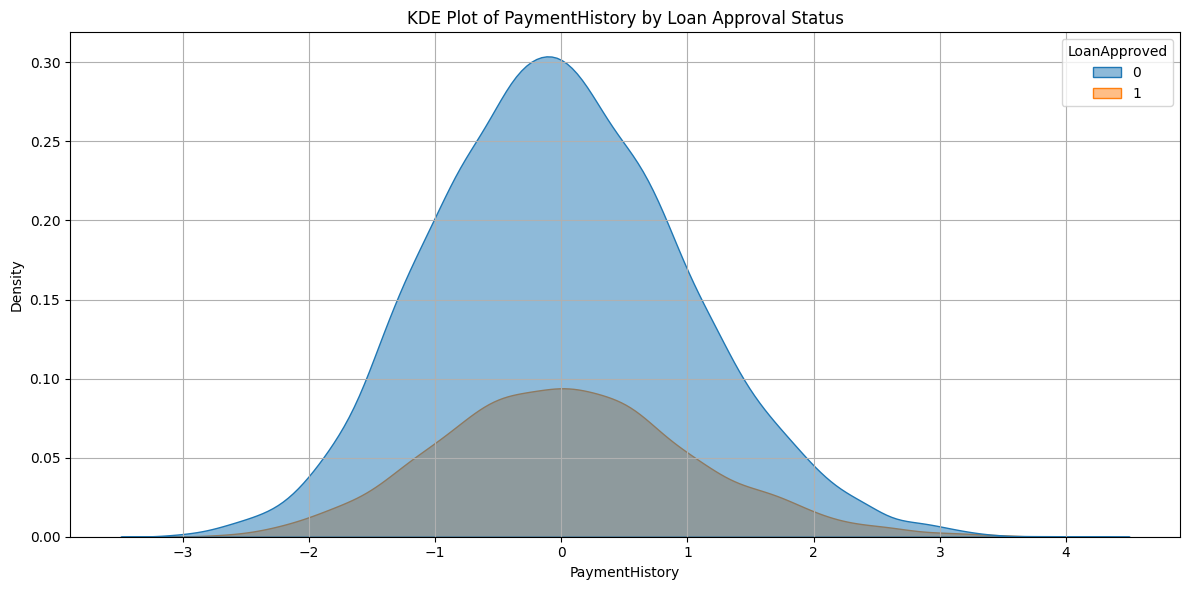

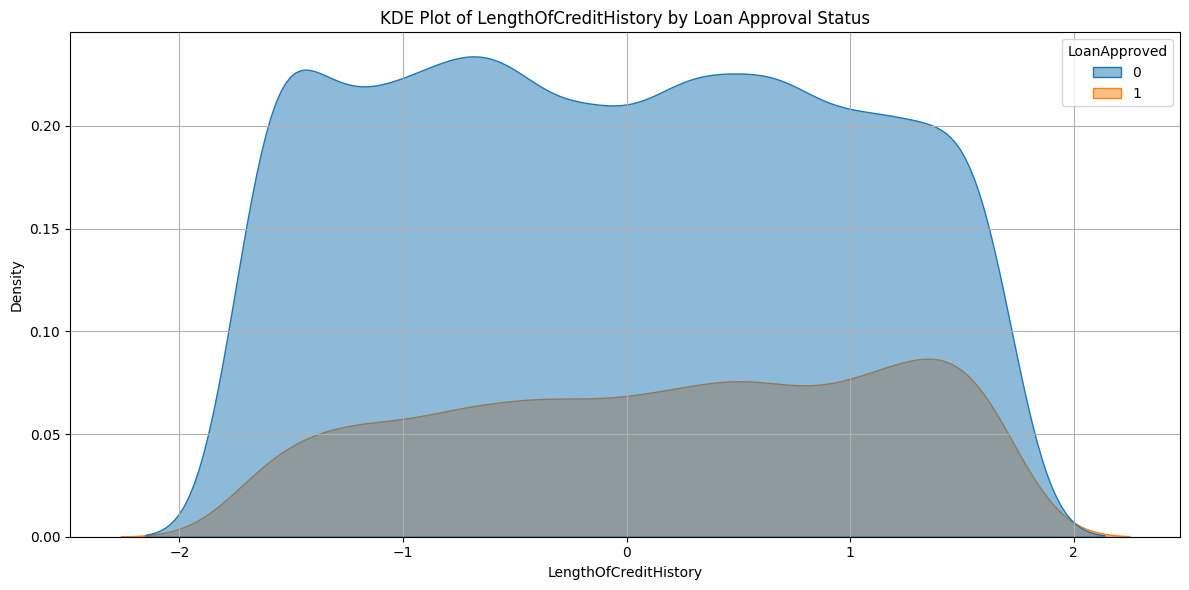

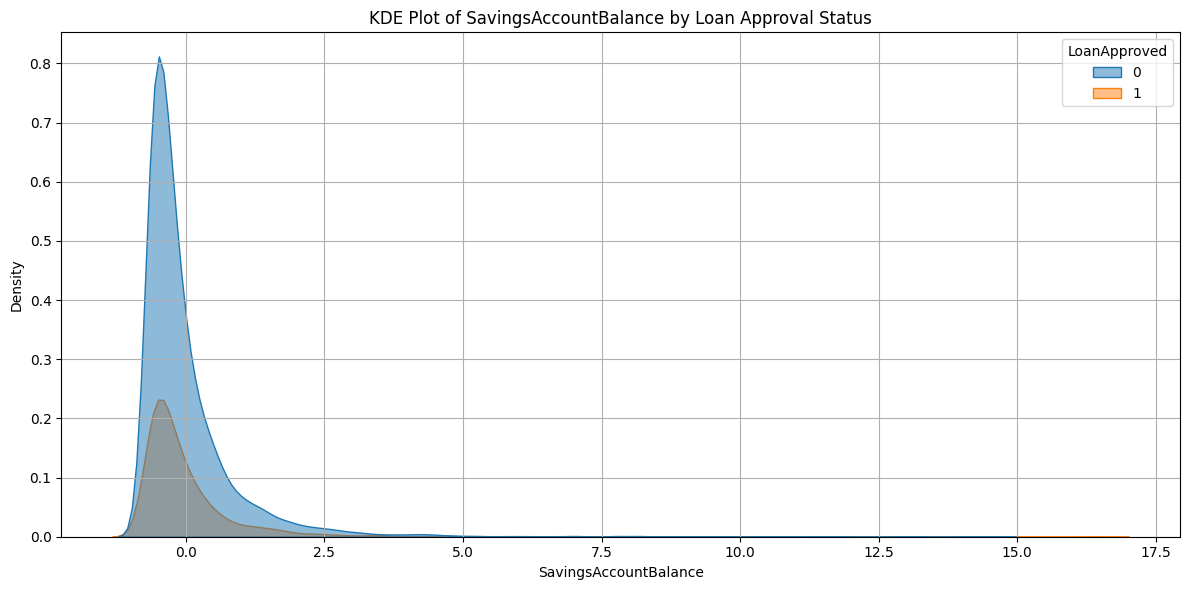

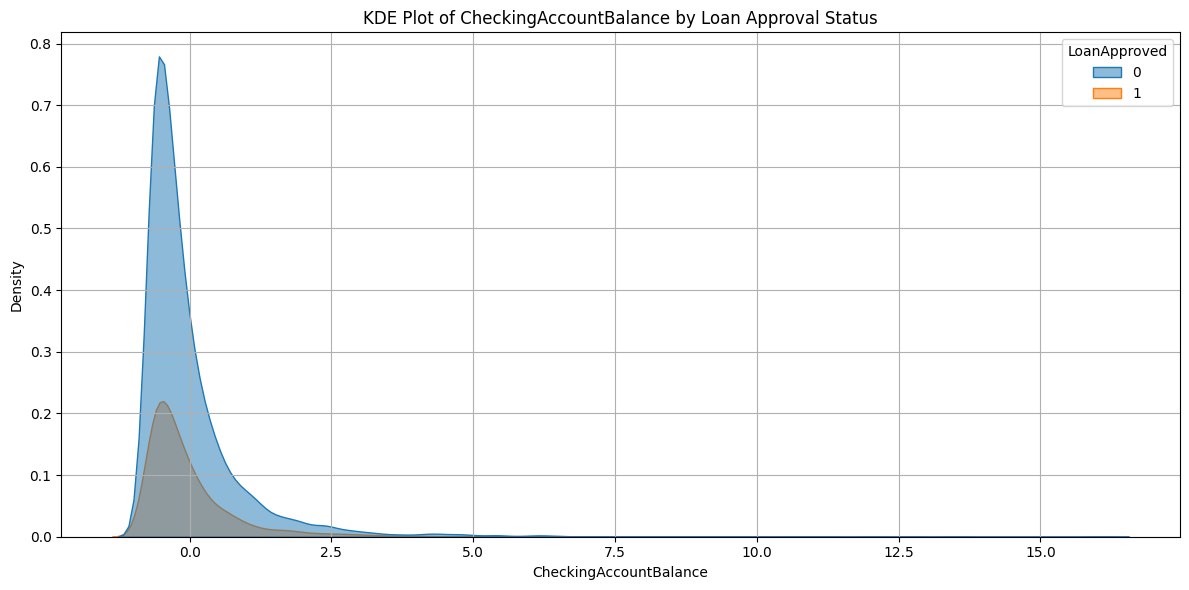

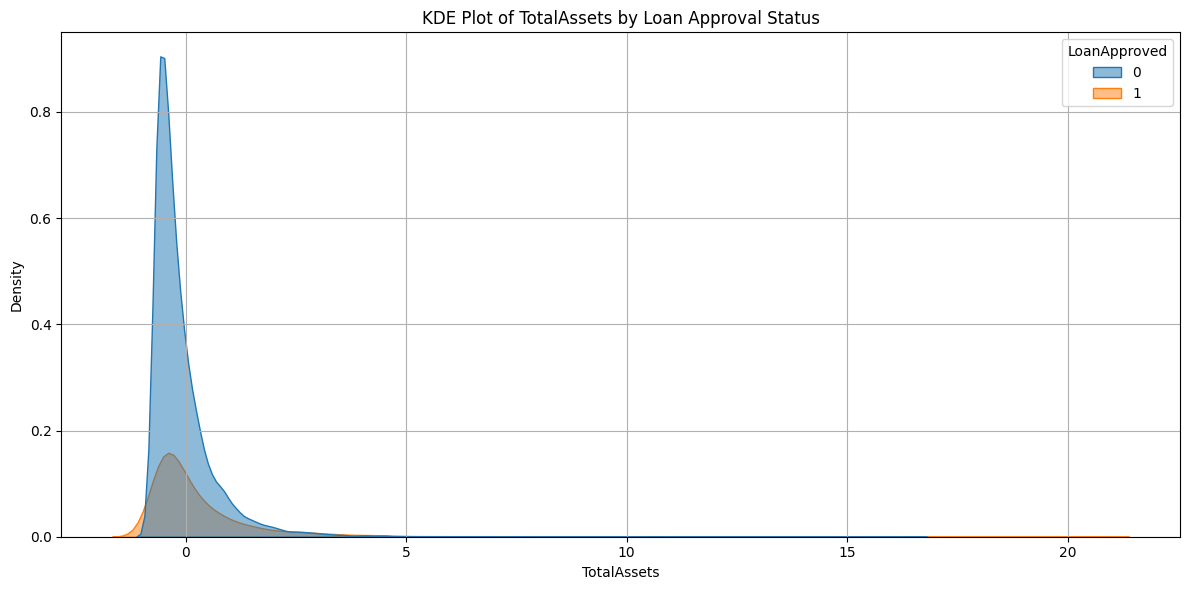

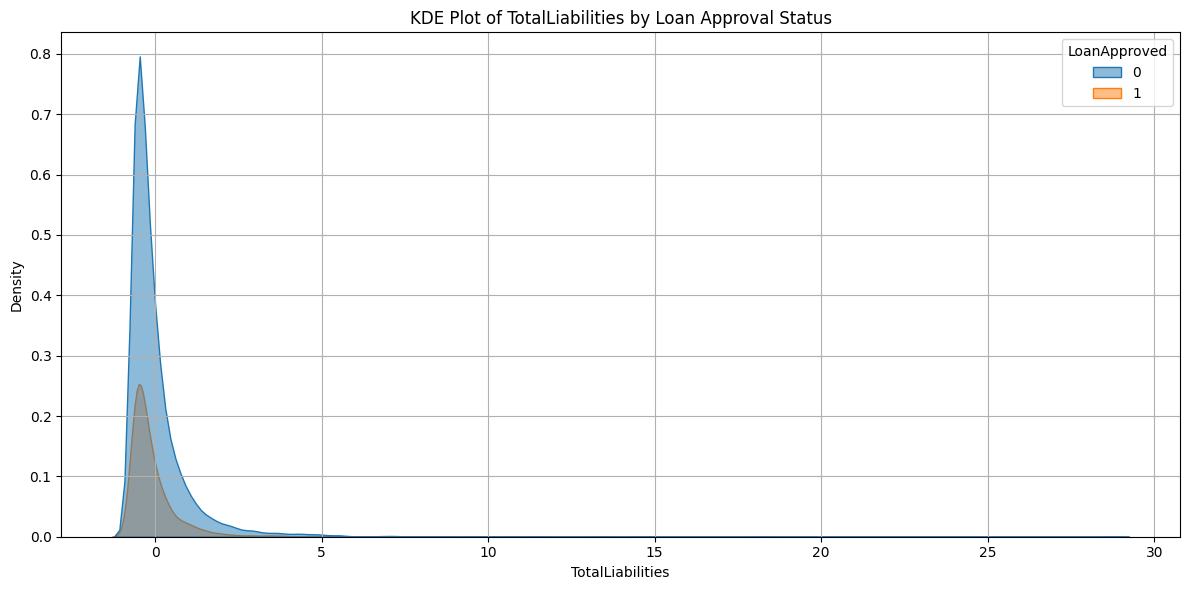

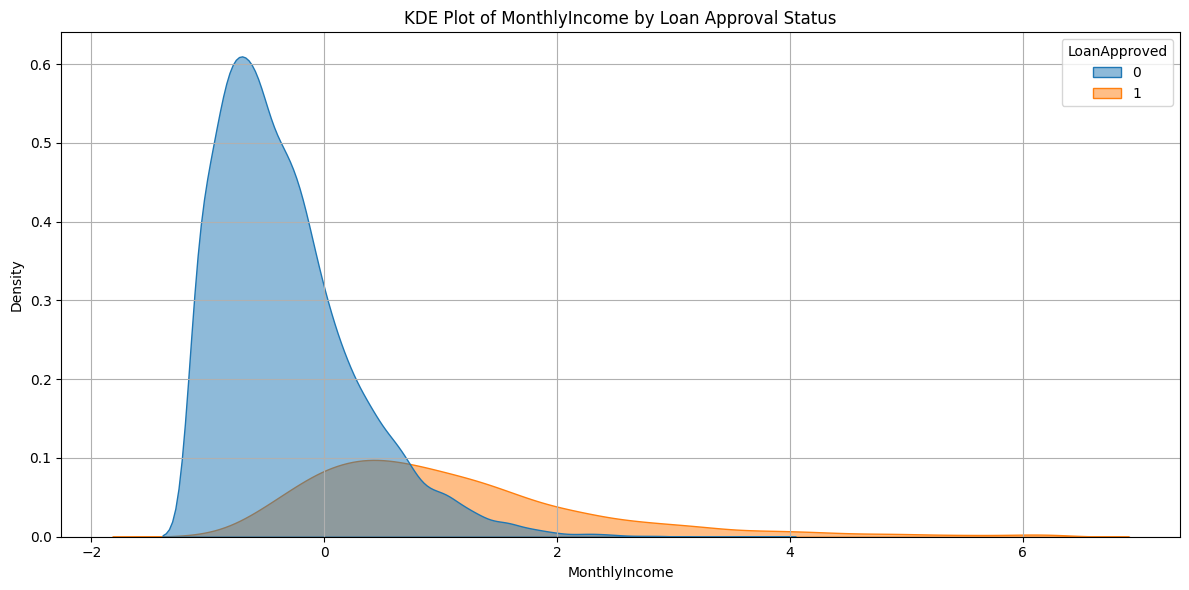

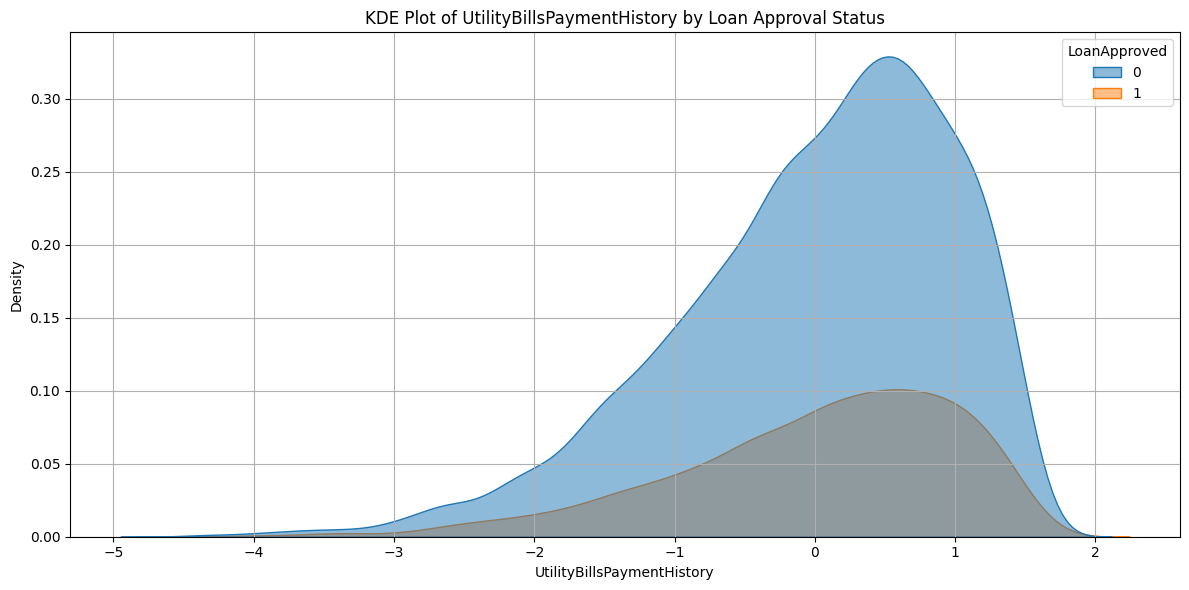

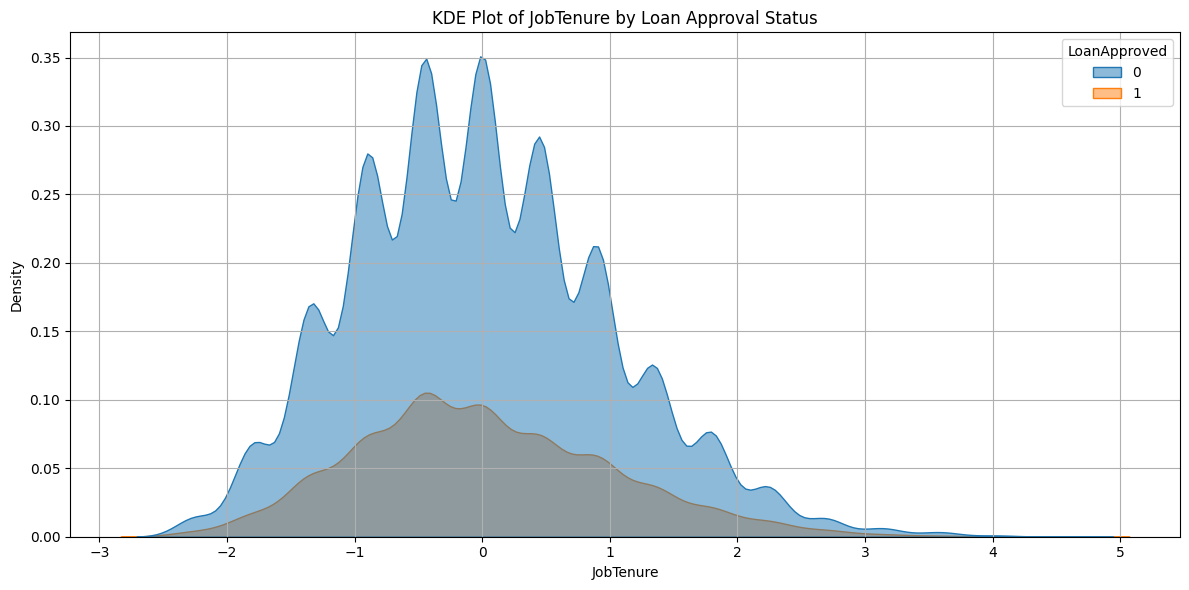

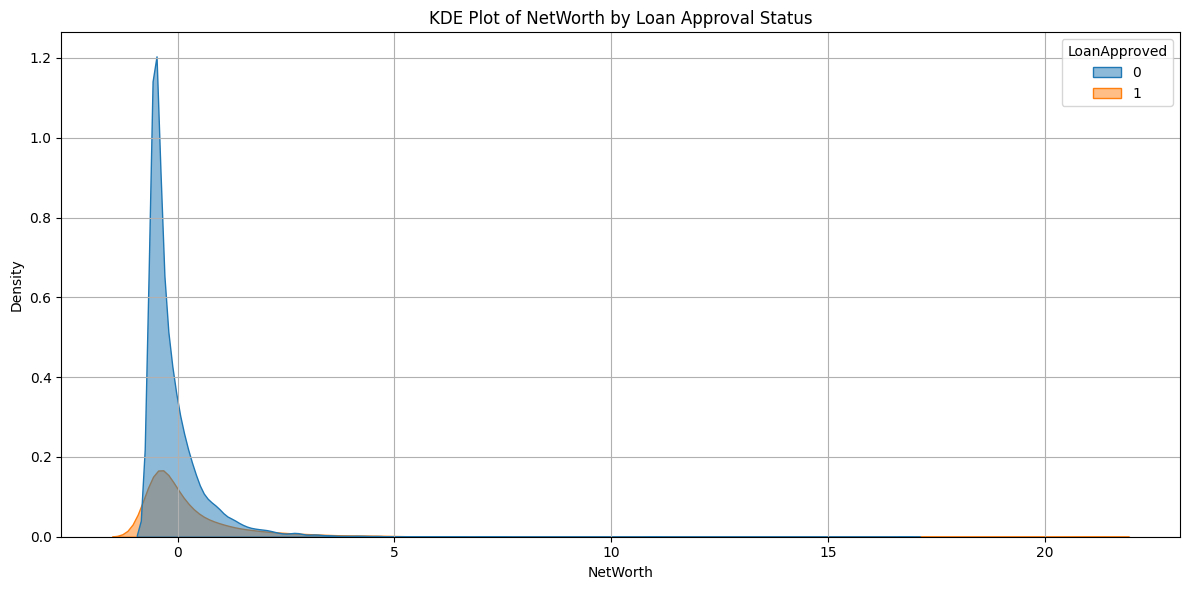

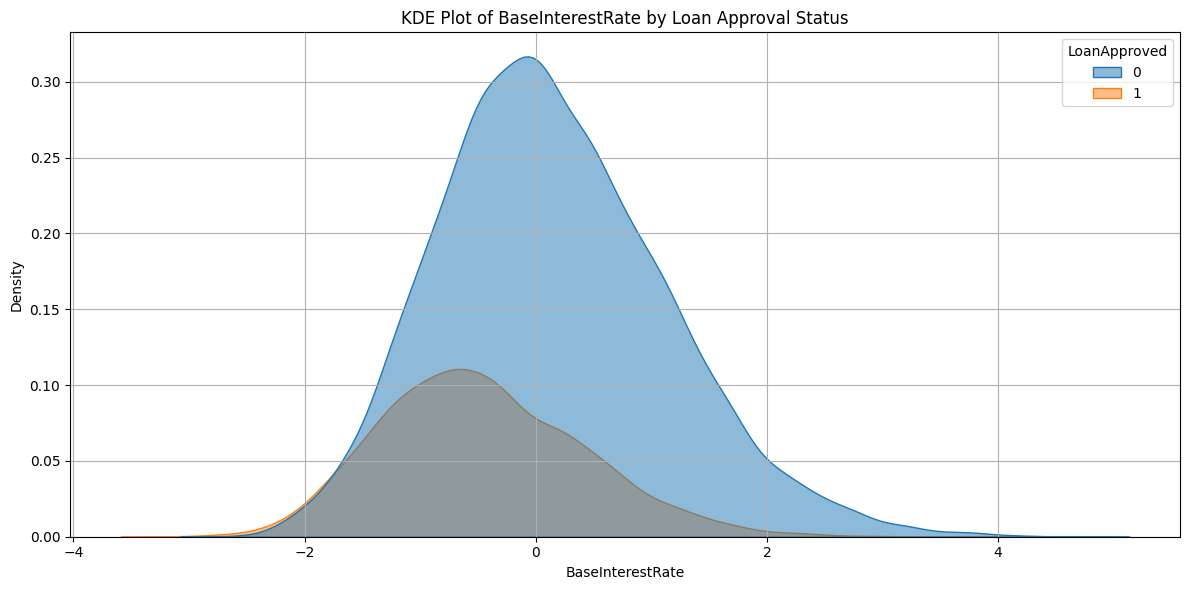

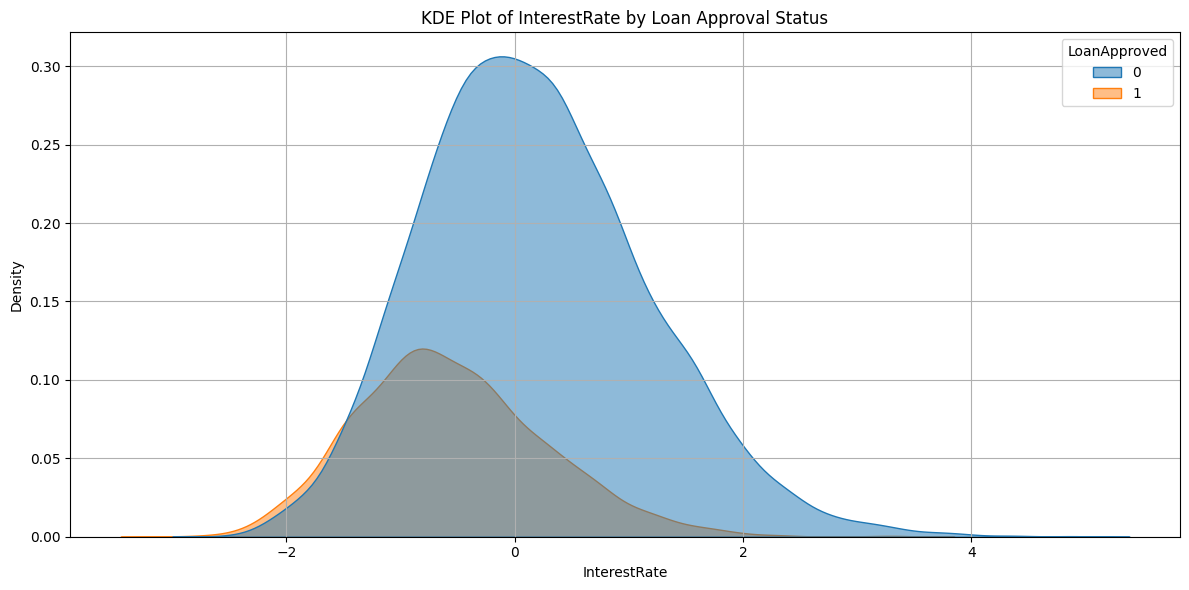

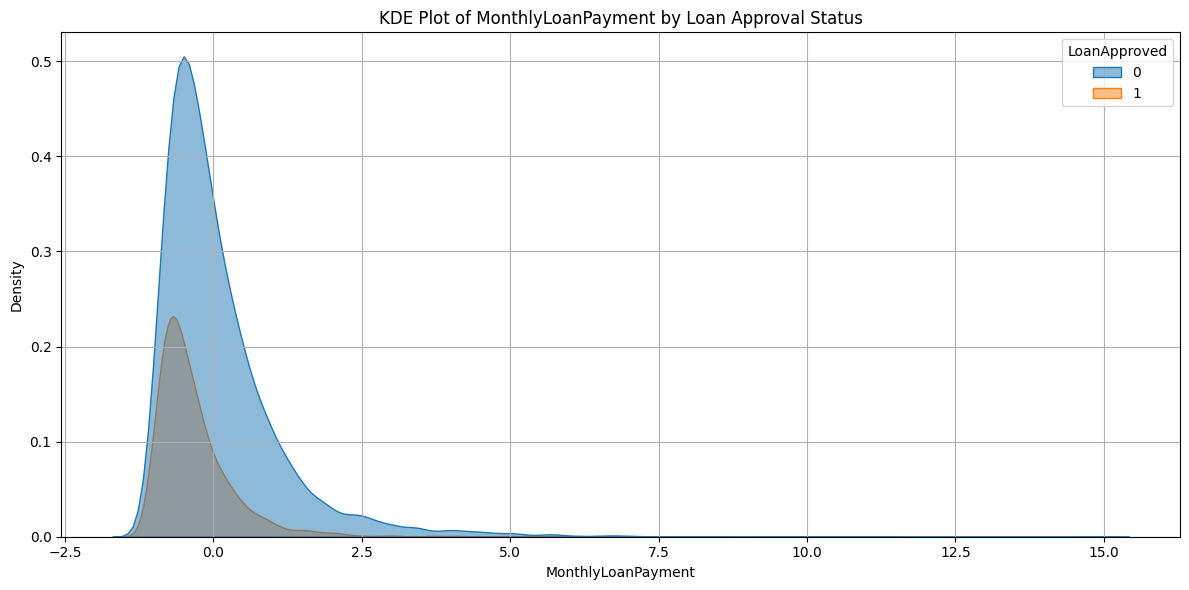

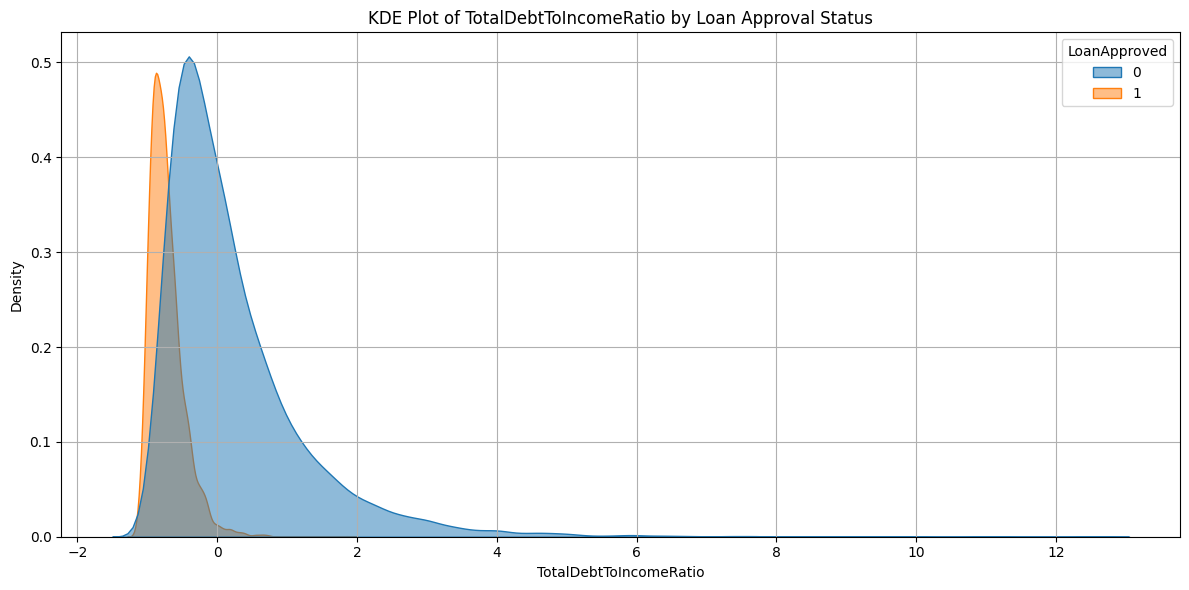

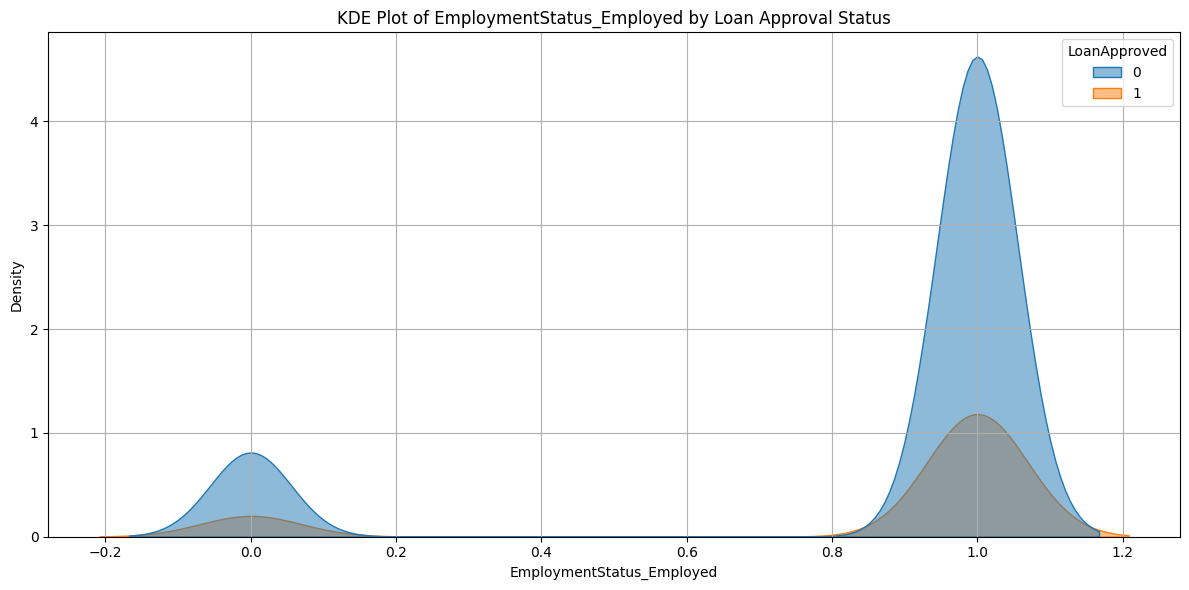

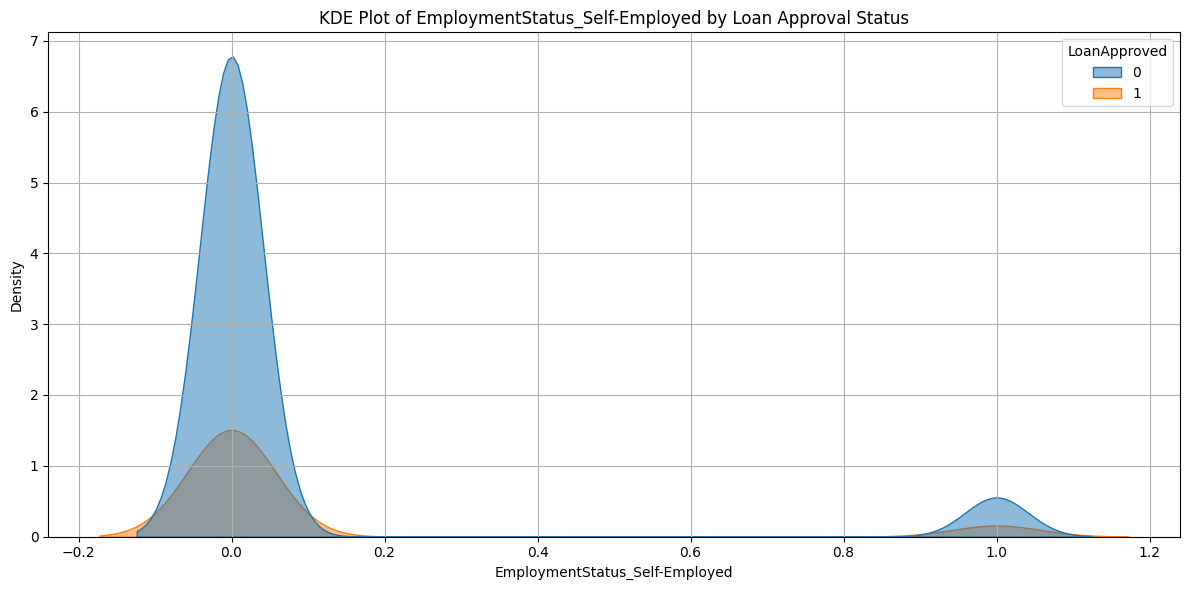

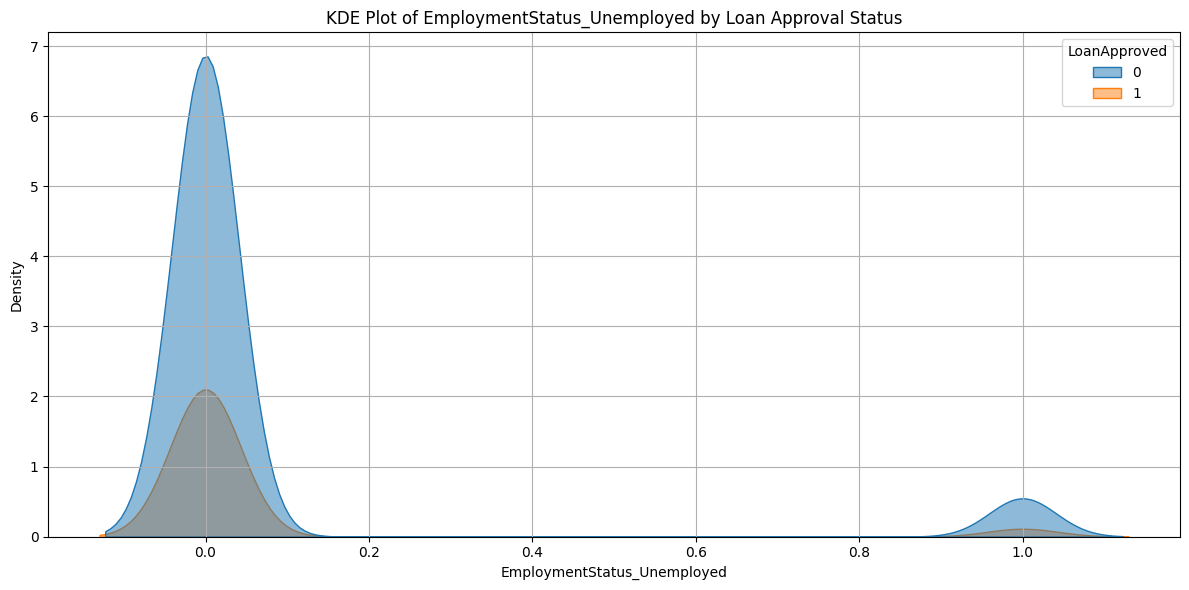

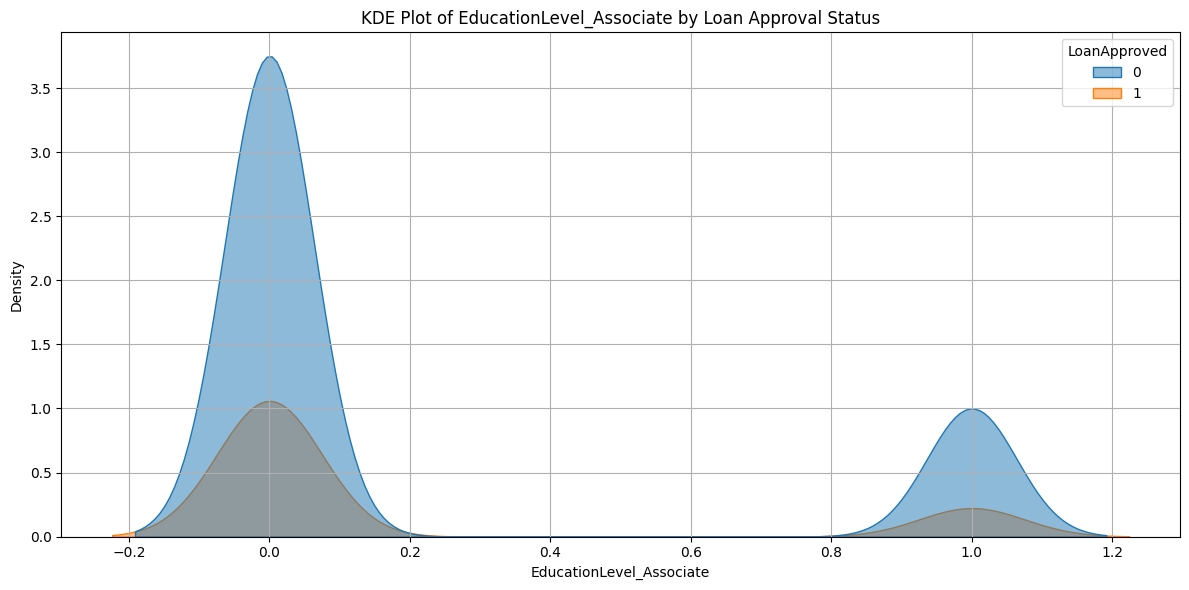

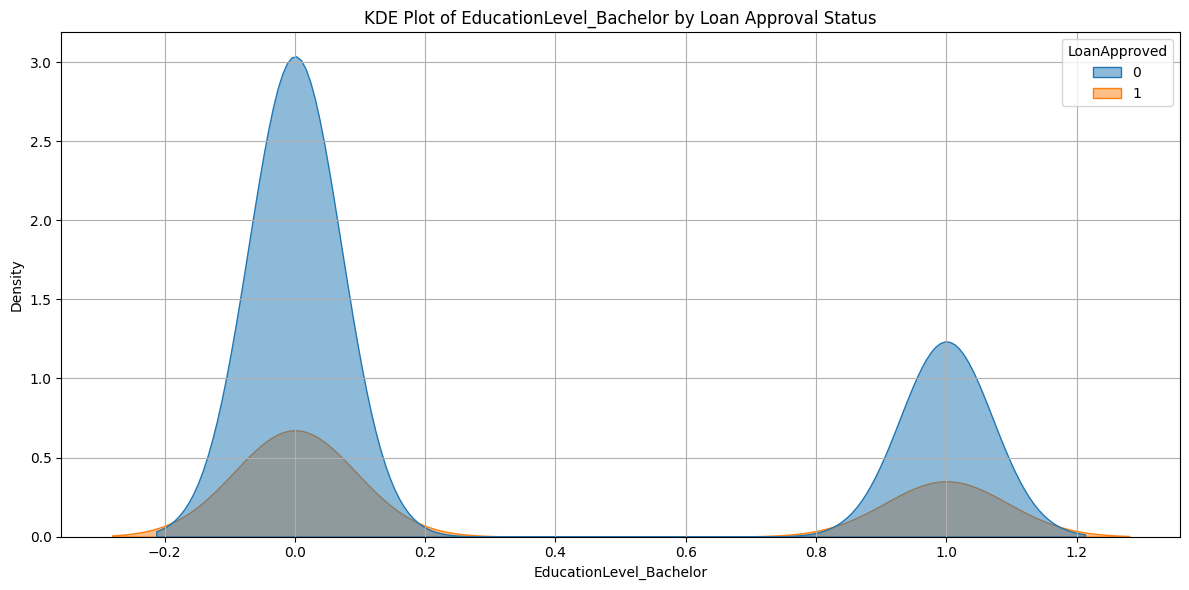

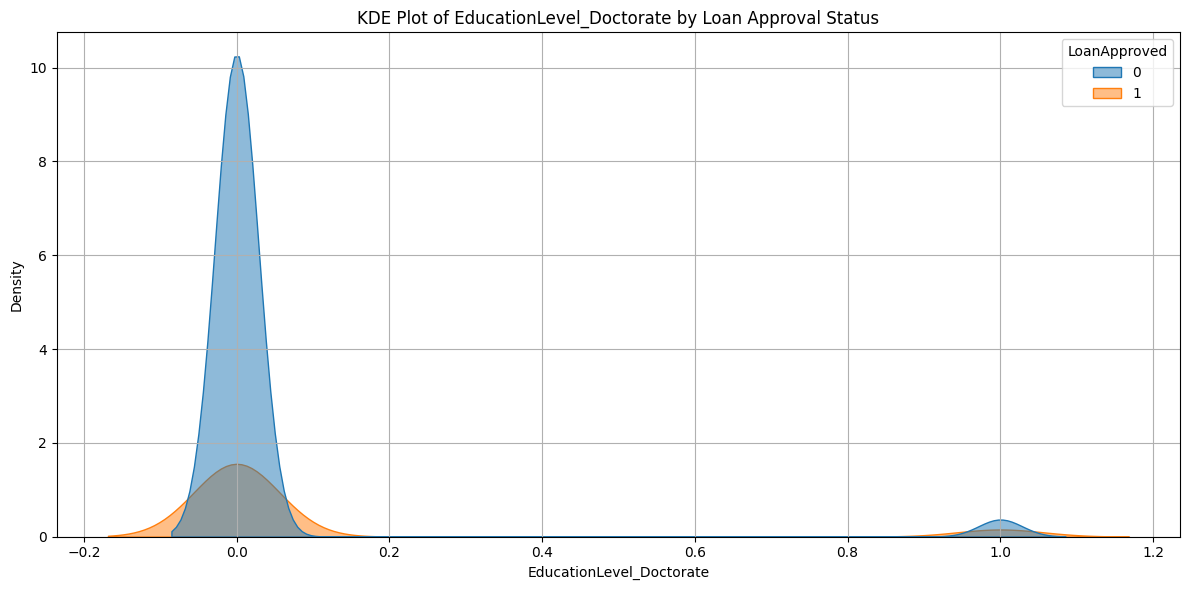

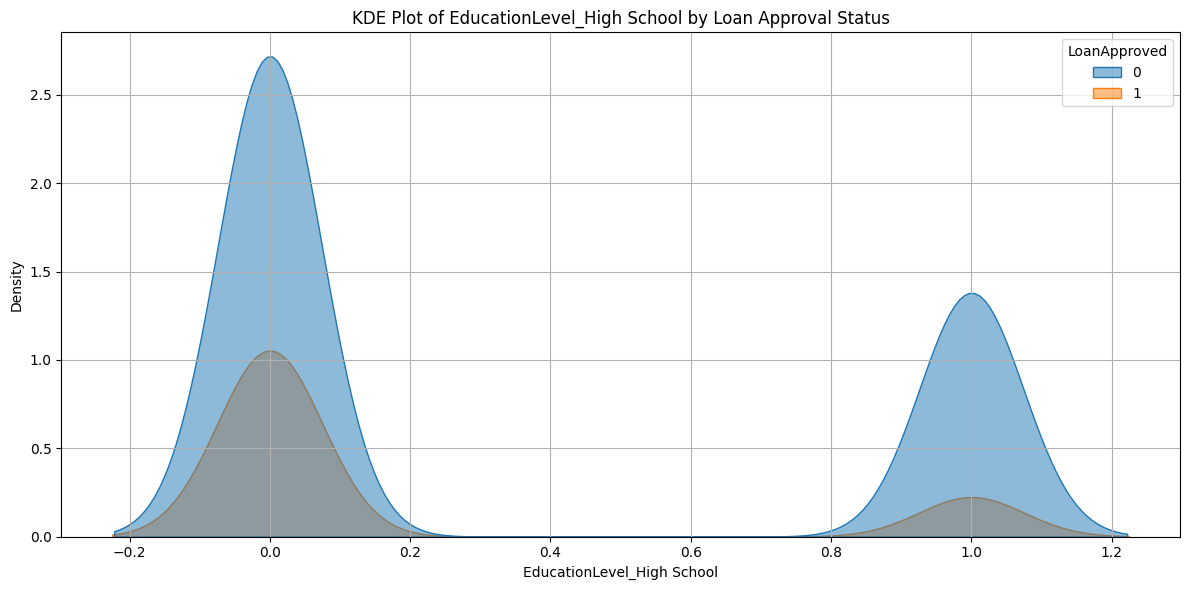

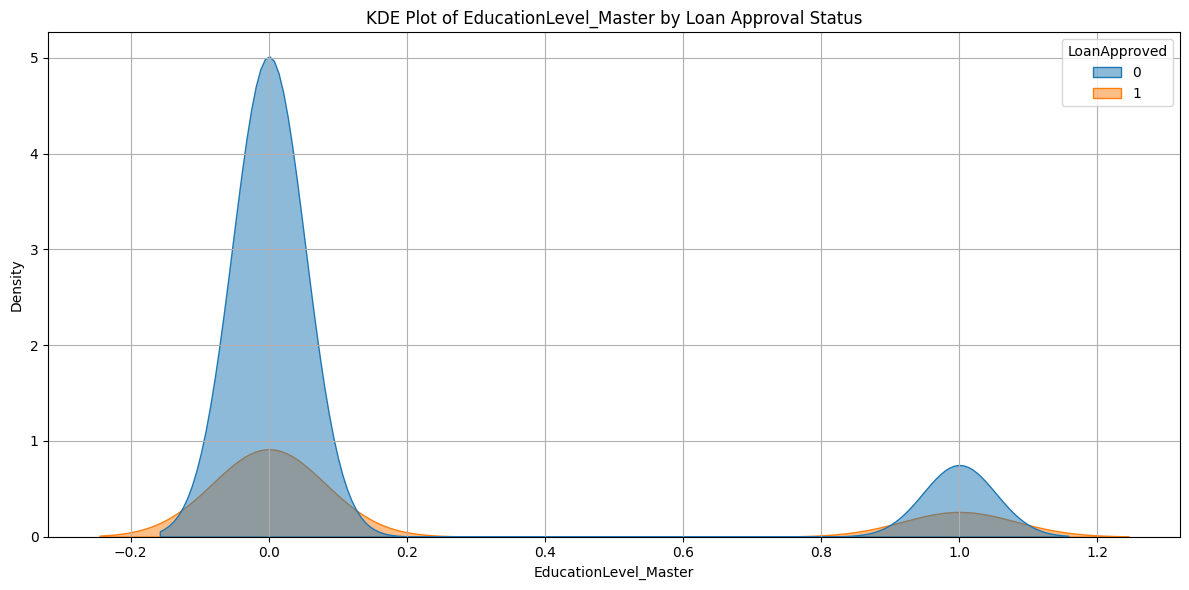

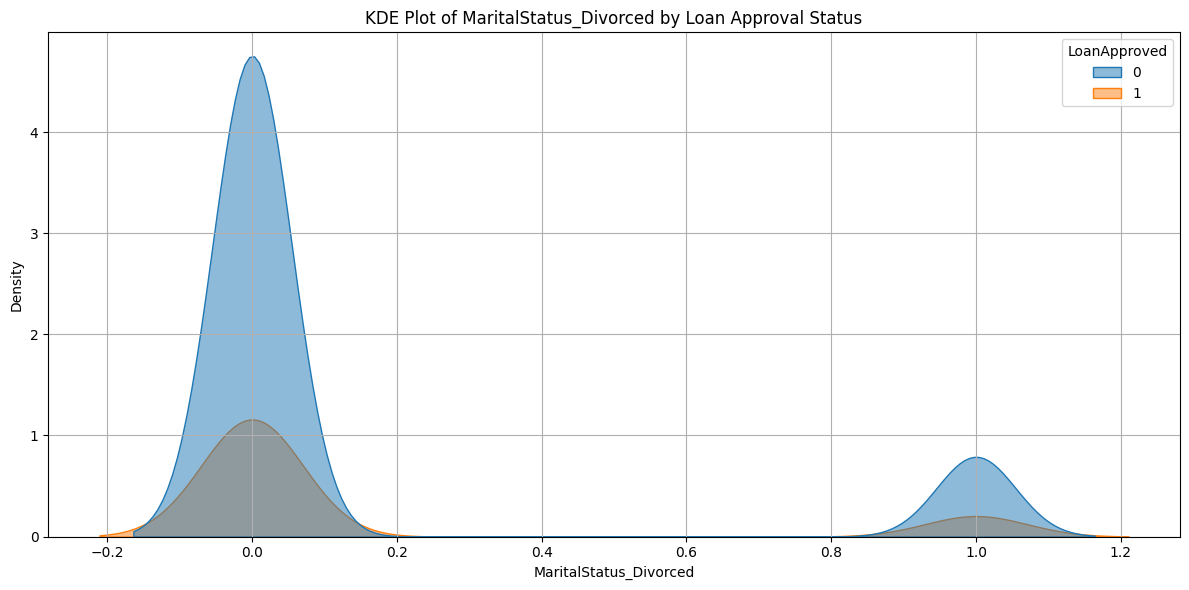

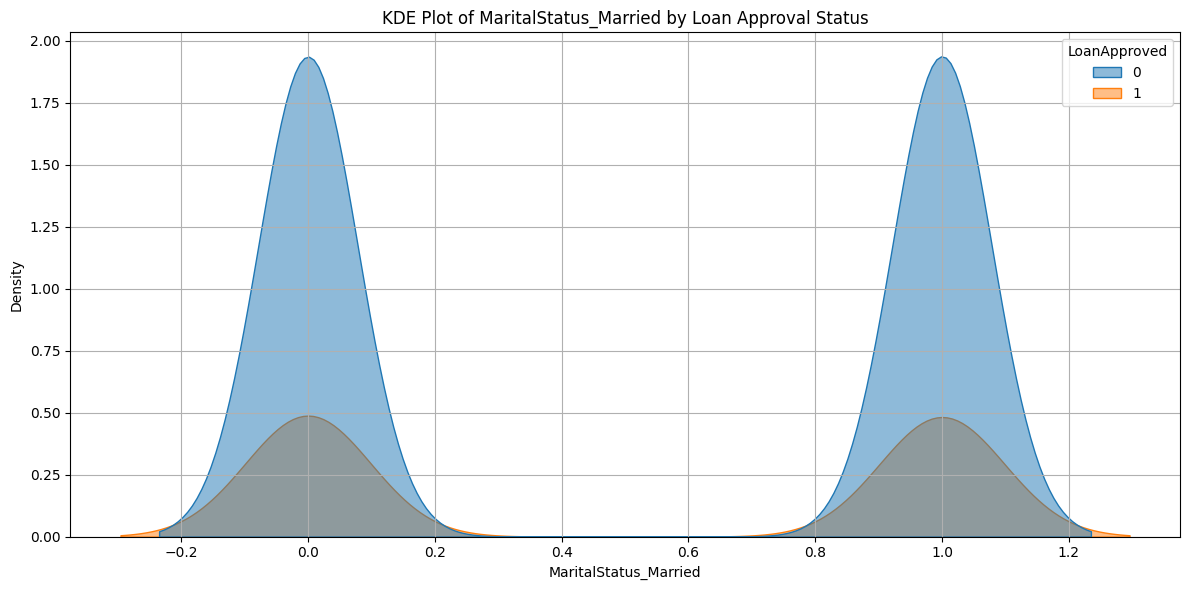

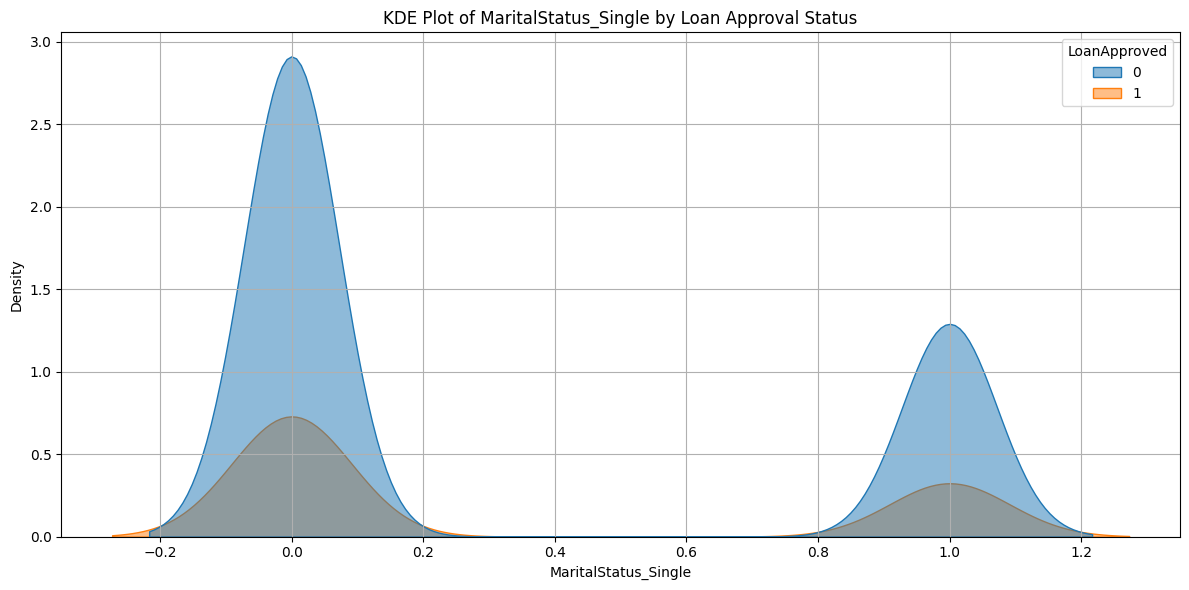

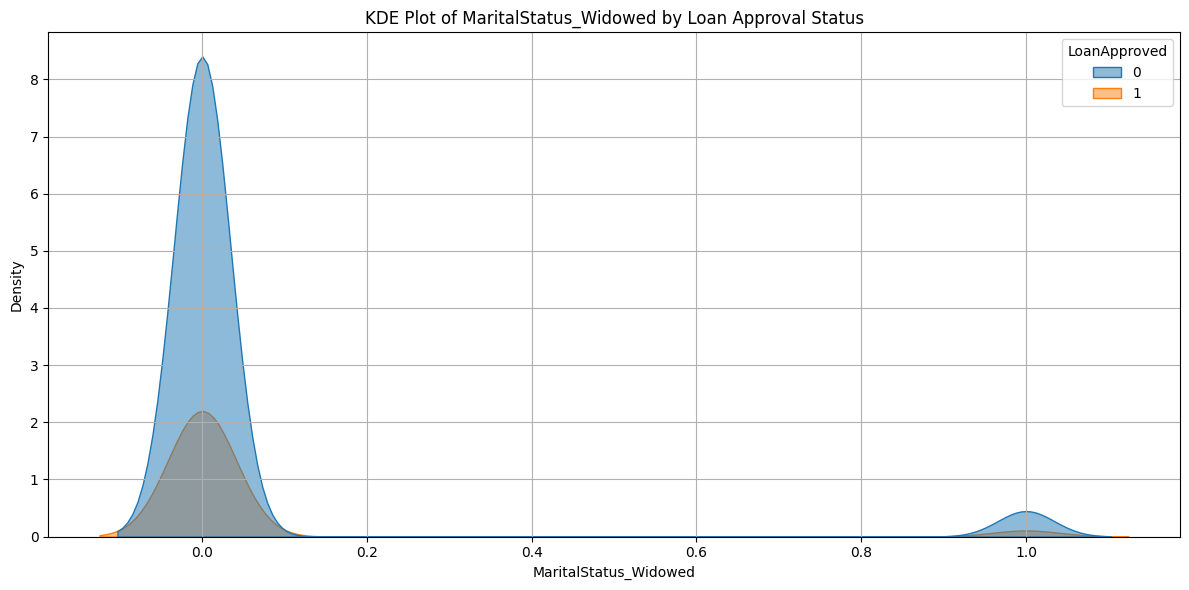

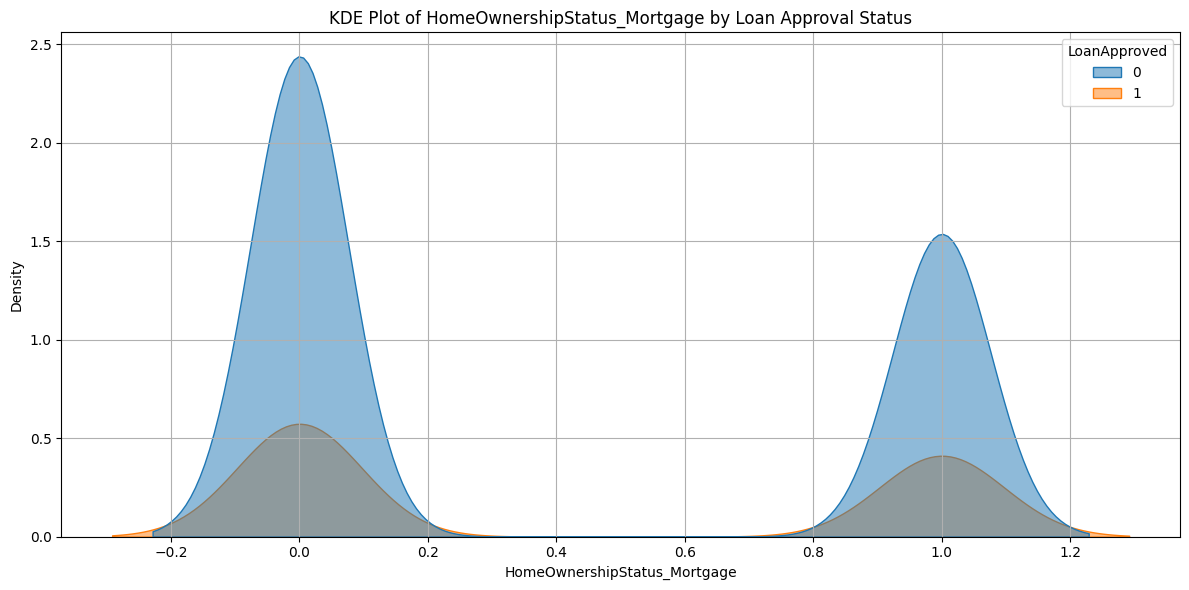

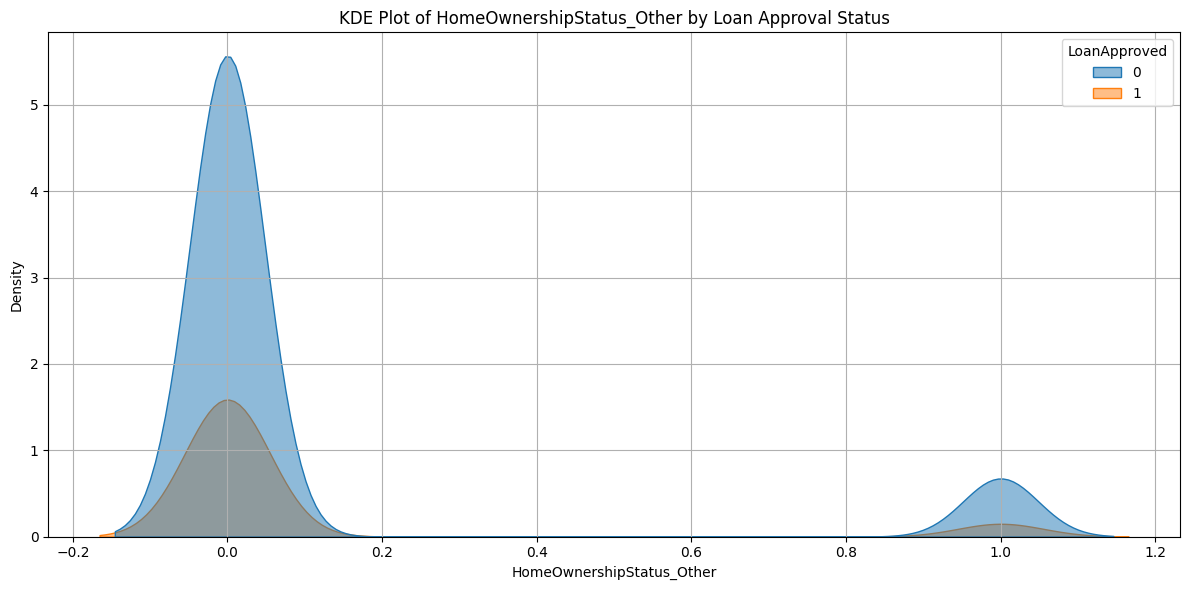

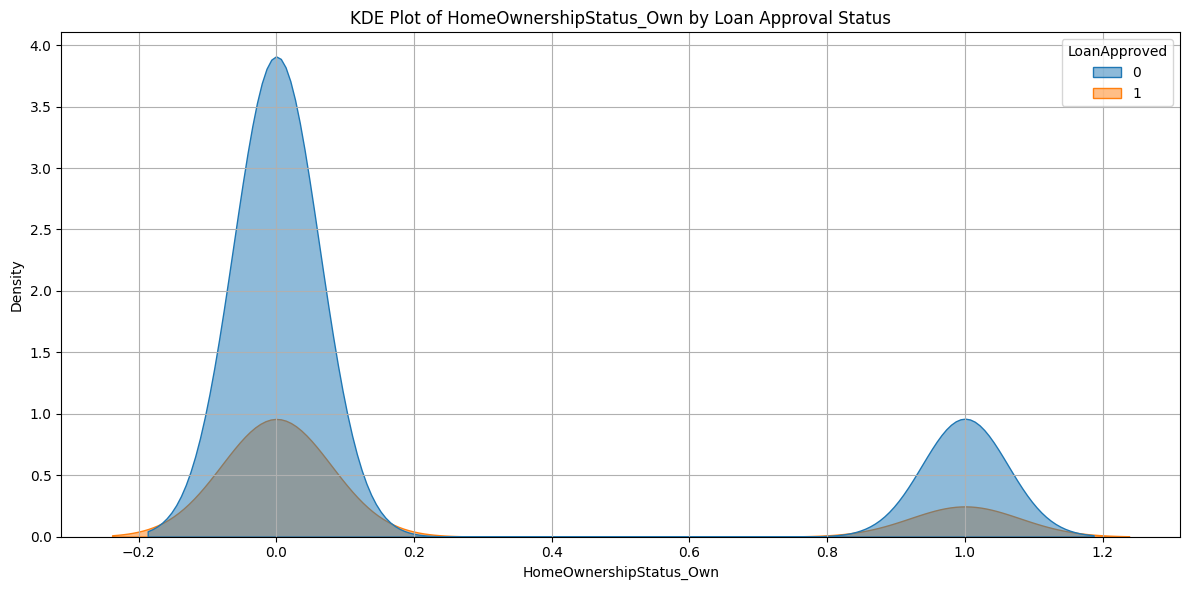

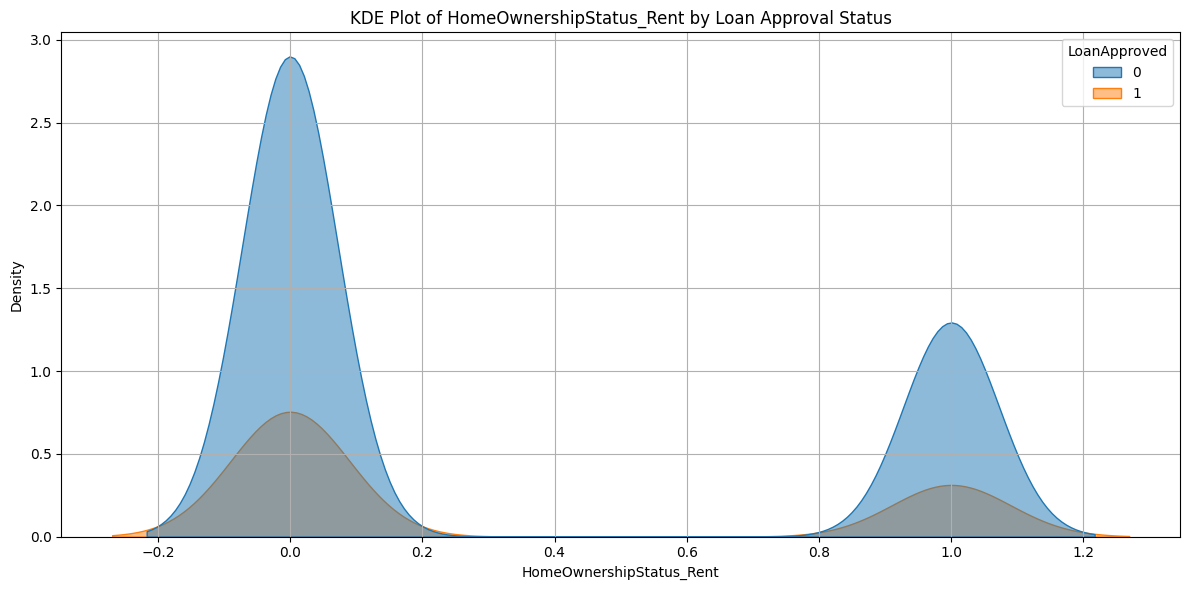

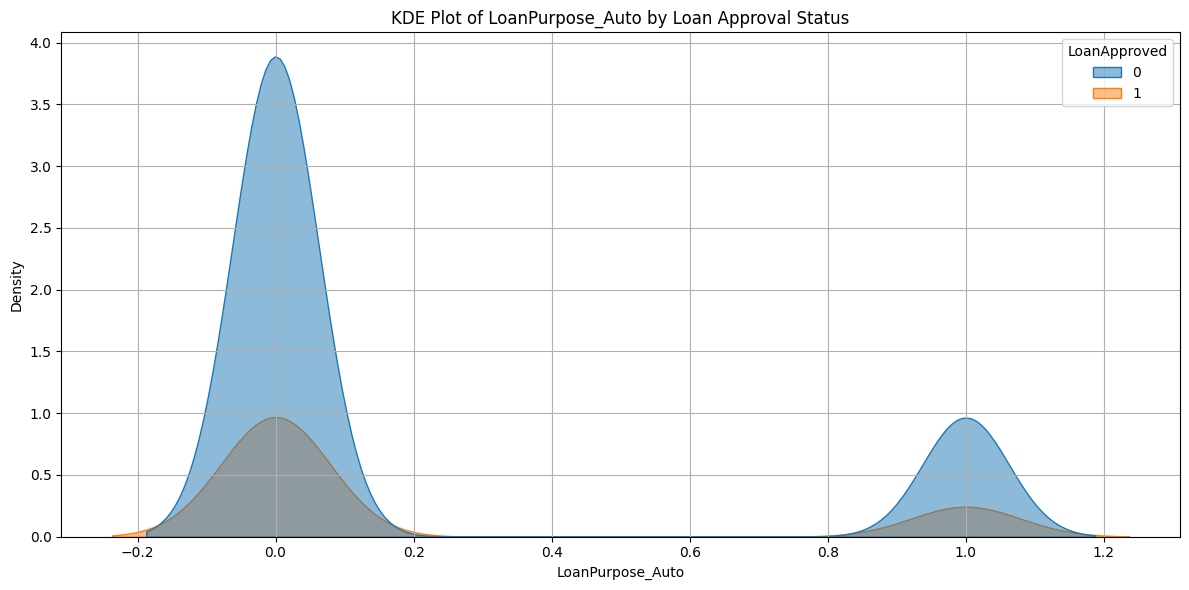

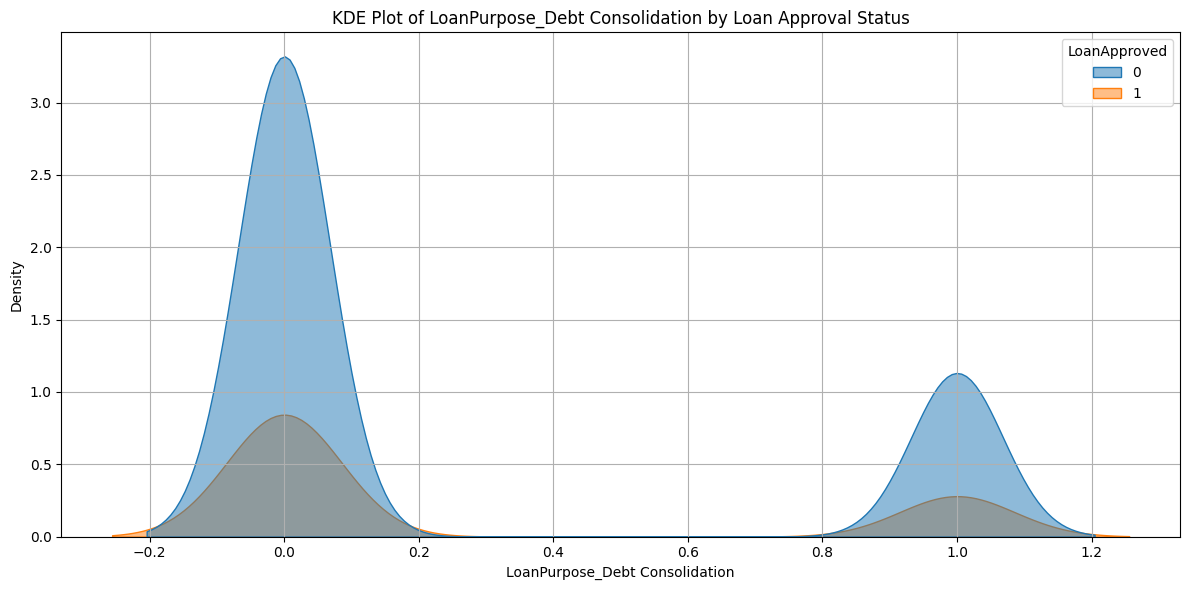

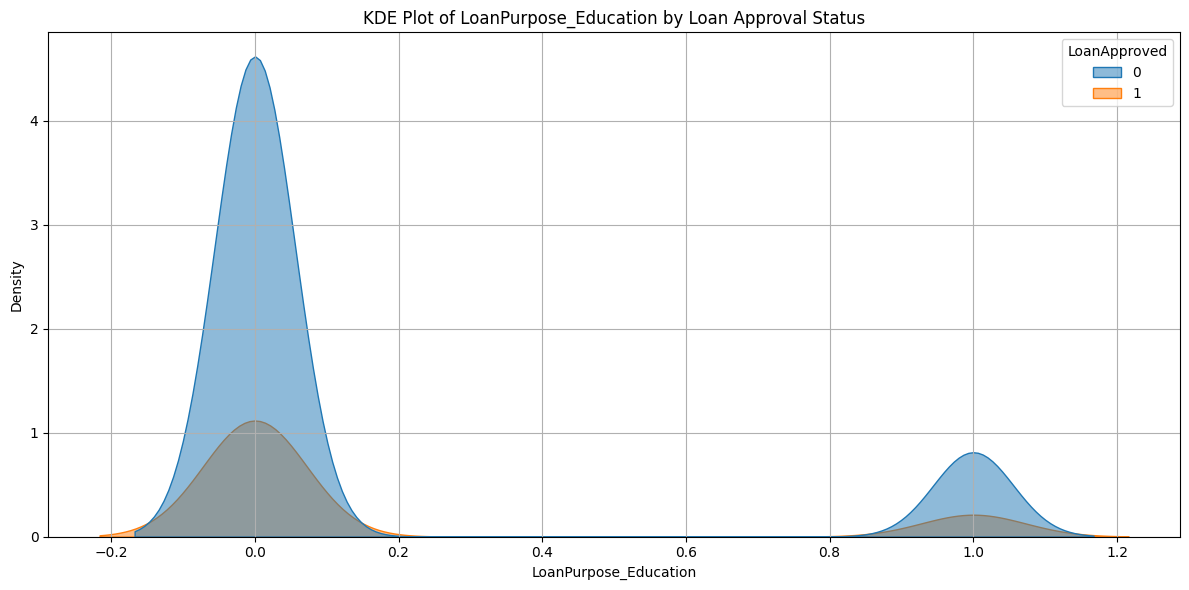

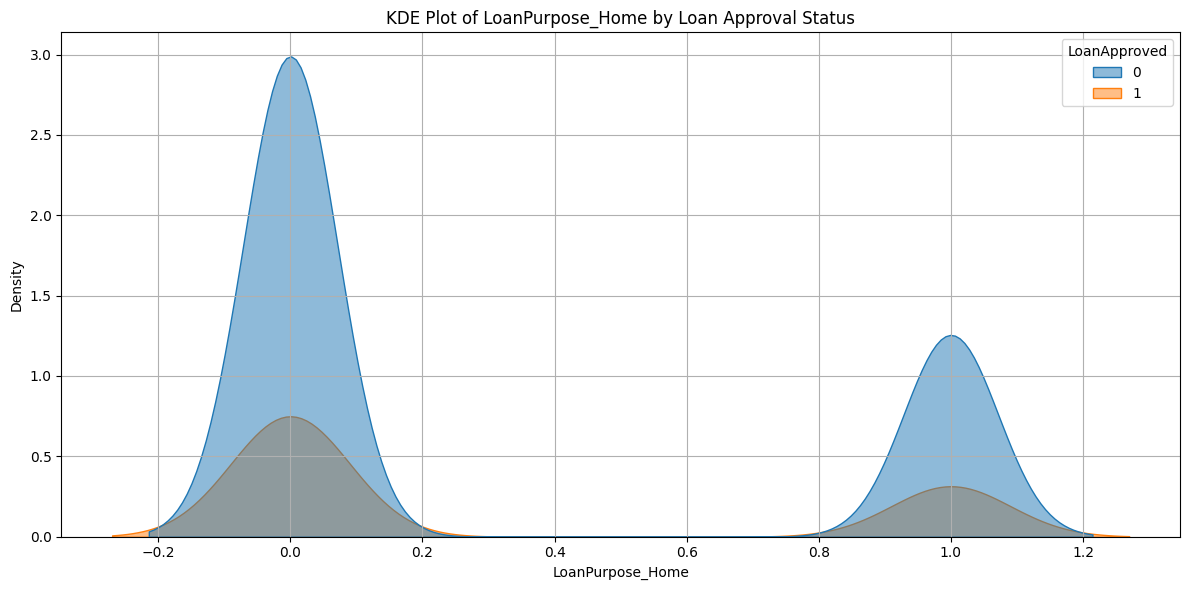

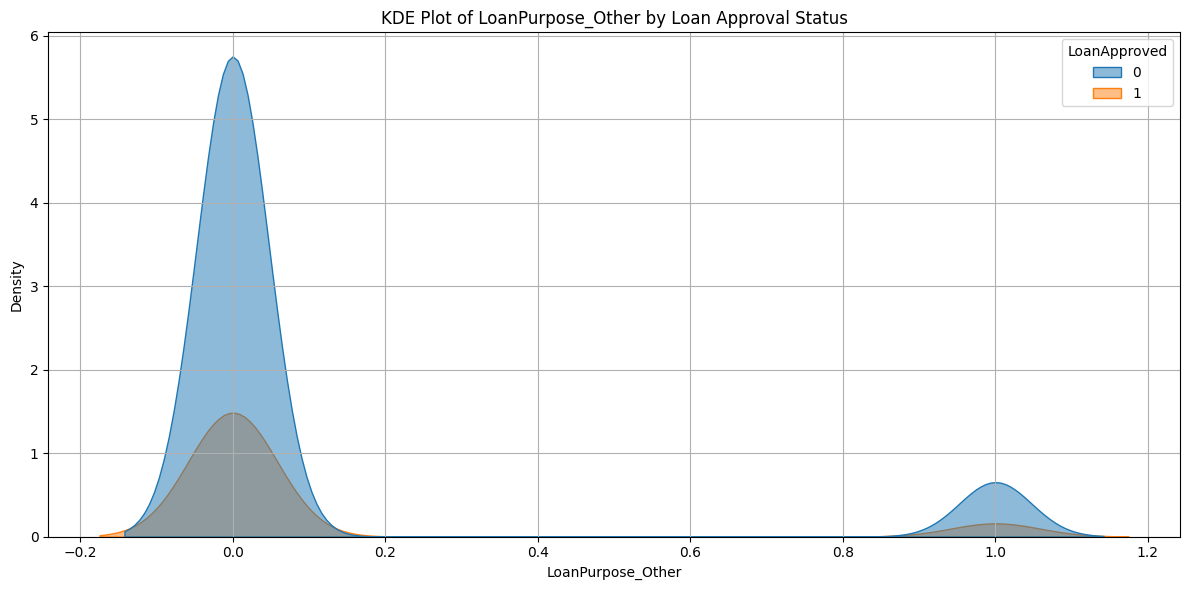

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding LoanApproved back to the prepared data
prepared_data['LoanApproved'] = y_train.values

# Split independent variables and target
independent_vars = prepared_data.drop(columns=['LoanApproved'])
target = prepared_data['LoanApproved']

# Visualize the relationship between independent variables and LoanApproved
for column in independent_vars.columns:
    plt.figure(figsize=(12, 6))

    if column in cat_features:  # If the feature is categorical
        sns.boxplot(x=target, y=independent_vars[column])
        plt.title(f'Boxplot of {column} by Loan Approval Status')
        plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
        plt.ylabel(column)
    else:  # If the feature is numerical
        sns.kdeplot(x=independent_vars[column], hue=target, fill=True, alpha=0.5)
        plt.title(f'KDE Plot of {column} by Loan Approval Status')
        plt.xlabel(column)
        plt.ylabel('Density')

    plt.grid()
    plt.tight_layout()
    plt.show()

## Running Models

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHistory',
                                                   'PreviousLoanDefaul...
                                                   'UtilityBillsPaymentHistory',
                                                   'JobTenure', 'NetWorth',
                                                   'BaseInterestRate',
                                                   'InterestRate',
                                                   'MonthlyLoanPayment',
                                                   'TotalDebtToIncomeRatio']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['EmploymentStatus',
                                                   'EducationLevel',
                                                   'MaritalStatus',
                                                   'HomeOwnershipStatus',
                                                   'LoanPurpose'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2245
           1       0.79      0.76      0.77       755

    accuracy                           0.89      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.89      0.89      0.89      3000



Confusion Matrix:
 [[2091  181]
 [ 154  574]]


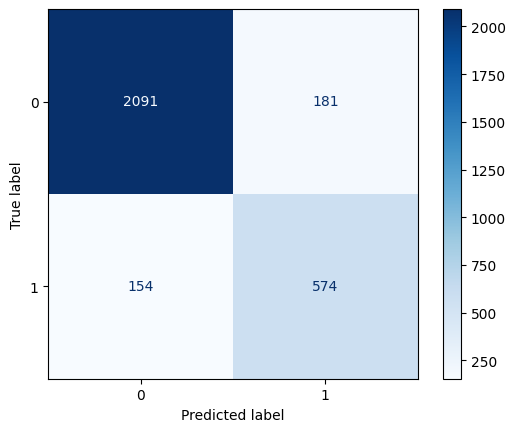

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Combine preprocessor with RandomForestClassifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHistory',
                                                   'PreviousLoanDefaul...
                                                   'UtilityBillsPaymentHistory',
                                                   'JobTenure', 'NetWorth',
                                                   'BaseInterestRate',
                                                   'InterestRate',
                                                   'MonthlyLoanPayment',
                                                   'TotalDebtToIncomeRatio']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['EmploymentStatus',
                                                   'EducationLevel',
                                                   'MaritalStatus',
                                                   'HomeOwnershipStatus',
                                                   'LoanPurpose'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2322
           1       0.82      0.88      0.84       678

    accuracy                           0.93      3000
   macro avg       0.89      0.91      0.90      3000
weighted avg       0.93      0.93      0.93      3000



Confusion Matrix:
 [[2188   84]
 [ 134  594]]


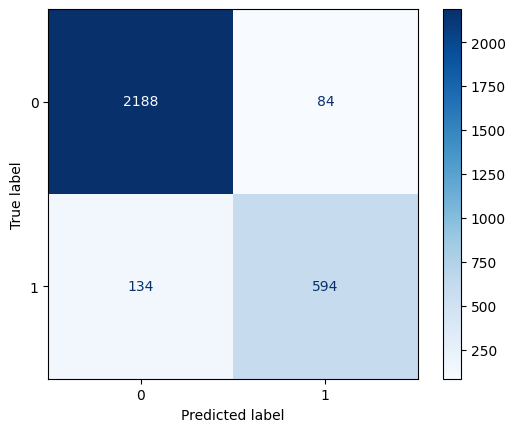

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Tuning the Hyperparameters for the Random Forest model

In [ ]:
# Dynamically identify numerical and categorical features
numerical_features = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]
categorical_features = [col for col in X_train.columns if not pd.api.types.is_numeric_dtype(X_train[col])]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with the mean
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   # One-hot encode categorical features
])

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Drop other columns not specified in transformers
)

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a pipeline that applies preprocessing and then trains the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Use RandomizedSearchCV to find the best hyperparameters
rand_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions={
        'classifier__n_estimators': param_dist['n_estimators'],
        'classifier__max_depth': param_dist['max_depth'],
        'classifier__min_samples_split': param_dist['min_samples_split'],
        'classifier__min_samples_leaf': param_dist['min_samples_leaf'],
        'classifier__max_features': param_dist['max_features']
    },
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model using both numerical and encoded categorical features
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyt

Best hyperparameters: {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 264}


In [ ]:
# Evaluate the tuned model on the validation set from the split set
y_val_pred = best_rf.predict(X_val)
print("\nTuned Model Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))

# Evaluate the tuned model on the test set from the split set
y_test_pred = best_rf.predict(X_test)
print("\nTuned Model Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Tuned Model Validation Set Evaluation:
[[2272    0]
 [ 728    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2272
           1       0.00      0.00      0.00       728

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.57      0.76      0.65      3000

Accuracy: 0.7573333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Tuned Model Test Set Evaluation:
[[2306    0]
 [ 694    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2306
           1       0.00      0.00      0.00       694

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.67      3000

Accuracy: 0.7686666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As the accuracy using Hyperparameter tuning is lower than using train, test and validate method potentially due to large dataset, the previous model seems to perform better in predicting the LoanApproved.

## ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Combine preprocessor with classifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHi...
                                                   'TotalDebtToIncomeRatio',
                                                   'RiskScore']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ApplicationDate',
                                                   'EmploymentStatus',
                                                   'EducationLevel',
                                                   'MaritalStatus',
                                                   'HomeOwnershipStatus',
                                                   'LoanPurpose',
                                                   'Application_date'])])),
                ('classifier', ExtraTreesClassifier(random_state=42))])

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2522
           1       0.66      1.00      0.79       478

    accuracy                           0.92      3000
   macro avg       0.83      0.95      0.87      3000
weighted avg       0.94      0.92      0.92      3000



Confusion Matrix:
 [[2271    1]
 [ 251  477]]


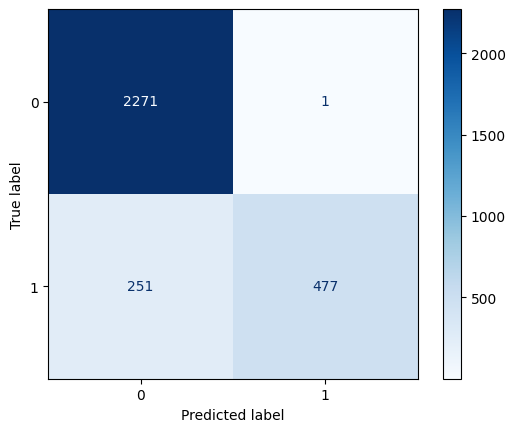

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Hyperparameter Tuning

In [ ]:
# Create an ExtraTrees Classifier
et = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a pipeline that applies preprocessing and then trains the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', et)
])

# Use RandomizedSearchCV to find the best hyperparameters
rand_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions={
        'classifier__n_estimators': param_dist['n_estimators'],
        'classifier__max_depth': param_dist['max_depth'],
        'classifier__min_samples_split': param_dist['min_samples_split'],
        'classifier__min_samples_leaf': param_dist['min_samples_leaf'],
        'classifier__max_features': param_dist['max_features']
    },
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the model using both numerical and encoded categorical features
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_et = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyt

Best hyperparameters: {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 264}


In [ ]:
# Evaluate the tuned model on the validation set from the split set
y_val_pred = best_rf.predict(X_val)
print("\nTuned Model Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))


Tuned Model Validation Set Evaluation:
[[2272    0]
 [ 728    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2272
           1       0.00      0.00      0.00       728

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.57      0.76      0.65      3000

Accuracy: 0.7573333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Combine preprocessor with classifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

In [ ]:
%timeit
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHistory',
                                                   'PreviousLoanDefaul...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2282
           1       0.89      0.90      0.90       718

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

In [ ]:
scores = []
max_d = list(range(1,11))

for i in max_d:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier',  XGBClassifier(max_depth=i,random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    scores.append(accuracy_score(y_pred, y_val))

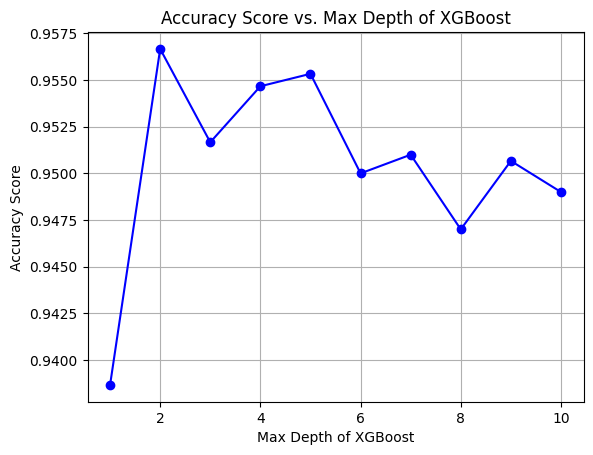

In [ ]:
import matplotlib.pyplot as plt

plt.plot(max_d, scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth of XGBoost")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs. Max Depth of XGBoost")
plt.grid(True)
plt.show()


In [ ]:
param_distribs = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'subsample': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier()
rnd_search = RandomizedSearchCV(xgb, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=2)

In [ ]:
rnd_search.fit(prepared_data, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   2.6s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_wei

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rnd_search.best_params_

{'subsample': 0.5,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 1}

In [ ]:
# Combine preprocessor with classifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        subsample=0.5,
        n_estimators=200,
        min_child_weight=5,
        max_depth=5,
        learning_rate=0.2,
        gamma=0.1,
        colsample_bytree=1,
        random_state=42
    ))
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHistory',
                                                   'PreviousLoanDefaul...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2289
           1       0.89      0.92      0.90       711

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



Confusion Matrix:
 [[2212   60]
 [  77  651]]


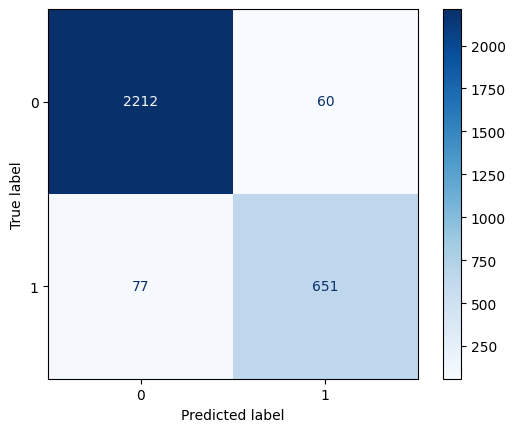

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

preprocessor_dummy = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False,
                                 drop='first'), cat_features)
    ])

prepared_data_dummy = preprocessor_dummy.fit_transform(X_train)

In [ ]:
logreg_onehot = LogisticRegression(penalty='elasticnet', solver='saga',
                                   max_iter=100, fit_intercept=False)
logreg_dummy = LogisticRegression(penalty='elasticnet', solver='saga',
                                  max_iter=100, fit_intercept=True)

# parameters for initial coarse search
params_coarse = {'C': np.linspace(0.1, 2.0, 5),
                 'class_weight': ['balanced', None],
                 'l1_ratio': np.linspace(0.0, 1.0, 5)}

logreg_onehot_coarse = GridSearchCV(logreg_onehot, params_coarse, scoring='accuracy')
logreg_dummy_coarse = GridSearchCV(logreg_dummy, params_coarse, scoring='accuracy')

In [ ]:
logreg_onehot_coarse.fit(prepared_data, y_train)
print(f'Best parameters: {logreg_onehot_coarse.best_params_}')
print(f'Best score: {logreg_onehot_coarse.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.0}
Best score: 1.0


In [ ]:
logreg_dummy_coarse.fit(prepared_data_dummy, y_train)
print(f'Best parameters: {logreg_dummy_coarse.best_params_}')
print(f'Best score: {logreg_dummy_coarse.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.575, 'class_weight': None, 'l1_ratio': 1.0}
Best score: 0.9657142857142856


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# parameters for fine search
params_onehot_fine = {'C': np.linspace(1.1, 1.9, 8),
                      'class_weight': ['balanced', None],
                      'l1_ratio': np.linspace(0.0, 0.4, 5)}

params_dummy_fine = {'C': np.linspace(0.2, 0.8, 8),
                      'class_weight': ['balanced', None],
                      'l1_ratio': np.linspace(0.75, 1.25, 5)}

# parameters for L2 penalty search
params_onehot_l2 = {'C': np.linspace(1.1, 1.9, 8),
                    'class_weight': ['balanced', None]}

params_dummy_l1 = {'C': np.linspace(0.2, 0.8, 8),
                   'class_weight': ['balanced', None]}

logreg_onehot_l2 = LogisticRegression(penalty='l2', solver='lbfgs',
                                      max_iter=100, fit_intercept=False)
logreg_dummy_l1 = LogisticRegression(penalty='l1', solver='liblinear',
                                     max_iter=100, fit_intercept=True)

logreg_onehot_fine = GridSearchCV(logreg_onehot, params_onehot_fine, scoring='accuracy')
logreg_dummy_fine = GridSearchCV(logreg_dummy, params_dummy_fine, scoring='accuracy')
logreg_onehot_l2 = GridSearchCV(logreg_onehot_l2, params_onehot_l2, scoring='accuracy')
logreg_dummy_l1 = GridSearchCV(logreg_dummy_l1, params_dummy_l1, scoring='accuracy')

In [ ]:
logreg_onehot_fine.fit(prepared_data, y_train)
print(f'Best parameters: {logreg_onehot_fine.best_params_}')
print(f'Best score: {logreg_onehot_fine.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 1.1, 'class_weight': 'balanced', 'l1_ratio': 0.0}
Best score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logreg_dummy_fine.fit(prepared_data_dummy, y_train)
print(f'Best parameters: {logreg_dummy_fine.best_params_}')
print(f'Best score: {logreg_dummy_fine.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.28571428571428575, 'class_weight': None, 'l1_ratio': 0.875}
Best score: 0.965642857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logreg_onehot_l2.fit(prepared_data, y_train)
print(f'Best parameters: {logreg_onehot_l2.best_params_}')
print(f'Best score: {logreg_onehot_l2.best_score_}')

Best parameters: {'C': 1.1, 'class_weight': 'balanced'}
Best score: 1.0


In [ ]:
logreg_dummy_l1.fit(prepared_data_dummy, y_train)
print(f'Best parameters: {logreg_dummy_l1.best_params_}')
print(f'Best score: {logreg_dummy_l1.best_score_}')

Best parameters: {'C': 0.8, 'class_weight': None}
Best score: 0.9667142857142859


##Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
rf_clf = RandomForestClassifier(max_depth=5,
                                           max_features='log2',
                                           min_samples_leaf=2,
                                           min_samples_split=4,
                                           n_estimators=264,
                                           random_state=42)

xgb_clf = XGBClassifier(
                              subsample=0.5,
                              n_estimators=200,
                              min_child_weight=5,
                              max_depth=5,
                              learning_rate=0.2,
                              gamma=0.1,
                              colsample_bytree=1,
                              random_state=42)

et_clf = ExtraTreesClassifier(max_depth=5,
                                           max_features='log2',
                                           min_samples_leaf=2,
                                           min_samples_split=4,
                                           n_estimators=264,
                                           random_state=42)

logit_clf = LogisticRegression(penalty='l2', solver='lbfgs', fit_intercept=False)


In [ ]:
named_estimators = [
    ("random_forest_clf", rf_clf),
    ("xgb_clf", xgb_clf),
    ("et_clf", et_clf),
    ("logit_clf", logit_clf),
]

In [ ]:
voting_clf = VotingClassifier(named_estimators)

In [ ]:
# Combine preprocessor with classifier in a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(named_estimators, voting='soft'))
])

In [ ]:
%timeit
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'AnnualIncome',
                                                   'CreditScore', 'Experience',
                                                   'LoanAmount', 'LoanDuration',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHi...
                                                             min_child_weight=5,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('et_clf',
                                               ExtraTreesClassifier(max_depth=5,
                                                                    max_features='log2',
                                                                    min_samples_leaf=2,
                                                                    min_samples_split=4,
                                                                    n_estimators=264,
                                                                    random_state=42)),
                                              ('logit_clf',
                                               LogisticRegression(fit_intercept=False))],
                                  voting='soft'))])

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_val)

# Classification Report
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2486
           1       0.70      1.00      0.83       514

    accuracy                           0.93      3000
   macro avg       0.85      0.96      0.89      3000
weighted avg       0.95      0.93      0.93      3000



Confusion Matrix:
 [[2271    1]
 [ 215  513]]


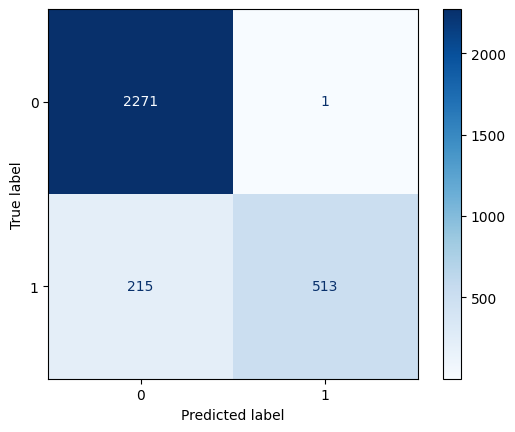

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

This is the best model

## Test Score

In [ ]:
# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2527
           1       0.68      1.00      0.81       473

    accuracy                           0.93      3000
   macro avg       0.84      0.96      0.88      3000
weighted avg       0.95      0.93      0.93      3000

